# Dependencies and files

## Imports

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import gseapy
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Global variables

## Load files

### Load normalized pseudobulks

In [2]:
adata_pb = sc.read_h5ad('../data/snRNAseq_data/velmeshevvelm_pb_sum.h5ad')
adata_pb = adata_pb[(adata_pb.obs.diagnosis == "Control")]
adata_pb

d:\Projects\spatialMPFC\venv\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


View of AnnData object with n_obs × n_vars = 321 × 41202
    obs: 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'psbulk_n_cells', 'psbulk_counts'
    var: 'gene_ids'
    layers: 'psbulk_props'

In [4]:
annot = sc.queries.biomart_annotations("hsapiens", ["ensembl_gene_id", "start_position", "end_position", "chromosome_name", "gene_biotype"])
adata_pb.var.columns = ['ensembl_gene_id']
new_var = adata_pb.var.reset_index().set_index('ensembl_gene_id').merge(annot.set_index('ensembl_gene_id'), left_index=True, right_index=True).reset_index().set_index('index')
adata_pb = adata_pb[:, new_var.index]
adata_pb.var = new_var
adata_pb

d:\Projects\spatialMPFC\venv\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


AnnData object with n_obs × n_vars = 321 × 40035
    obs: 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_gene_id', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype'
    layers: 'psbulk_props'

In [5]:
adata_pb = adata_pb[:, adata_pb.var.gene_biotype == 'protein_coding']
adata_pb

View of AnnData object with n_obs × n_vars = 321 × 18230
    obs: 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_gene_id', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype'
    layers: 'psbulk_props'

## Preprocess

In [6]:
sc.pp.filter_genes(adata_pb, min_counts=100)
sc.pp.filter_genes(adata_pb, min_cells=20)

d:\Projects\spatialMPFC\venv\lib\site-packages\scanpy\preprocessing\_simple.py:248: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_counts'] = number
d:\Projects\spatialMPFC\venv\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
d:\Projects\spatialMPFC\venv\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [7]:
adata_pb

AnnData object with n_obs × n_vars = 321 × 16101
    obs: 'cluster', 'sample', 'individual', 'region', 'age', 'sex', 'diagnosis', 'Capbatch', 'Seqbatch', 'post-mortem interval (hours)', 'RNA Integrity Number', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_gene_id', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype', 'n_counts', 'n_cells'
    layers: 'psbulk_props'

In [8]:
sc.pp.normalize_total(adata_pb, target_sum=1e4)
sc.pp.log1p(adata_pb)

d:\Projects\spatialMPFC\venv\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
d:\Projects\spatialMPFC\venv\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
d:\Projects\spatialMPFC\venv\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:484: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the rel

Highly variable genes: 3879


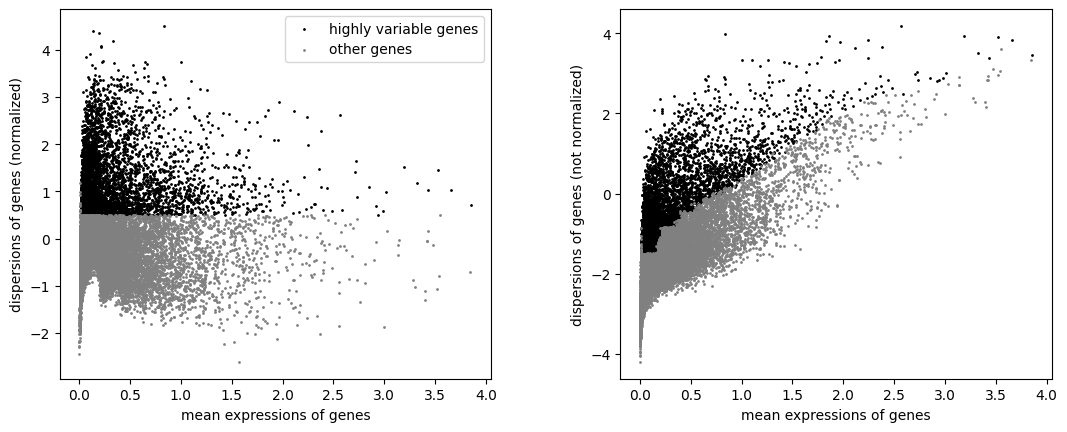

In [9]:
sc.pp.highly_variable_genes(adata_pb, batch_key='region', max_mean=5)
print("Highly variable genes: %d"%sum(adata_pb.var.highly_variable))

#plot variable genes
sc.pl.highly_variable_genes(adata_pb)

In [10]:
# subset for variable genes in the dataset
#adata_pb = adata_pb[:, adata_pb.var['highly_variable']]
#adata_pb

In [11]:
sc.tl.pca(adata_pb)

d:\Projects\spatialMPFC\venv\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


d:\Projects\spatialMPFC\venv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
d:\Projects\spatialMPFC\venv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
d:\Projects\spatialMPFC\venv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
d:\Projects\spatialMPFC\venv\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and wi

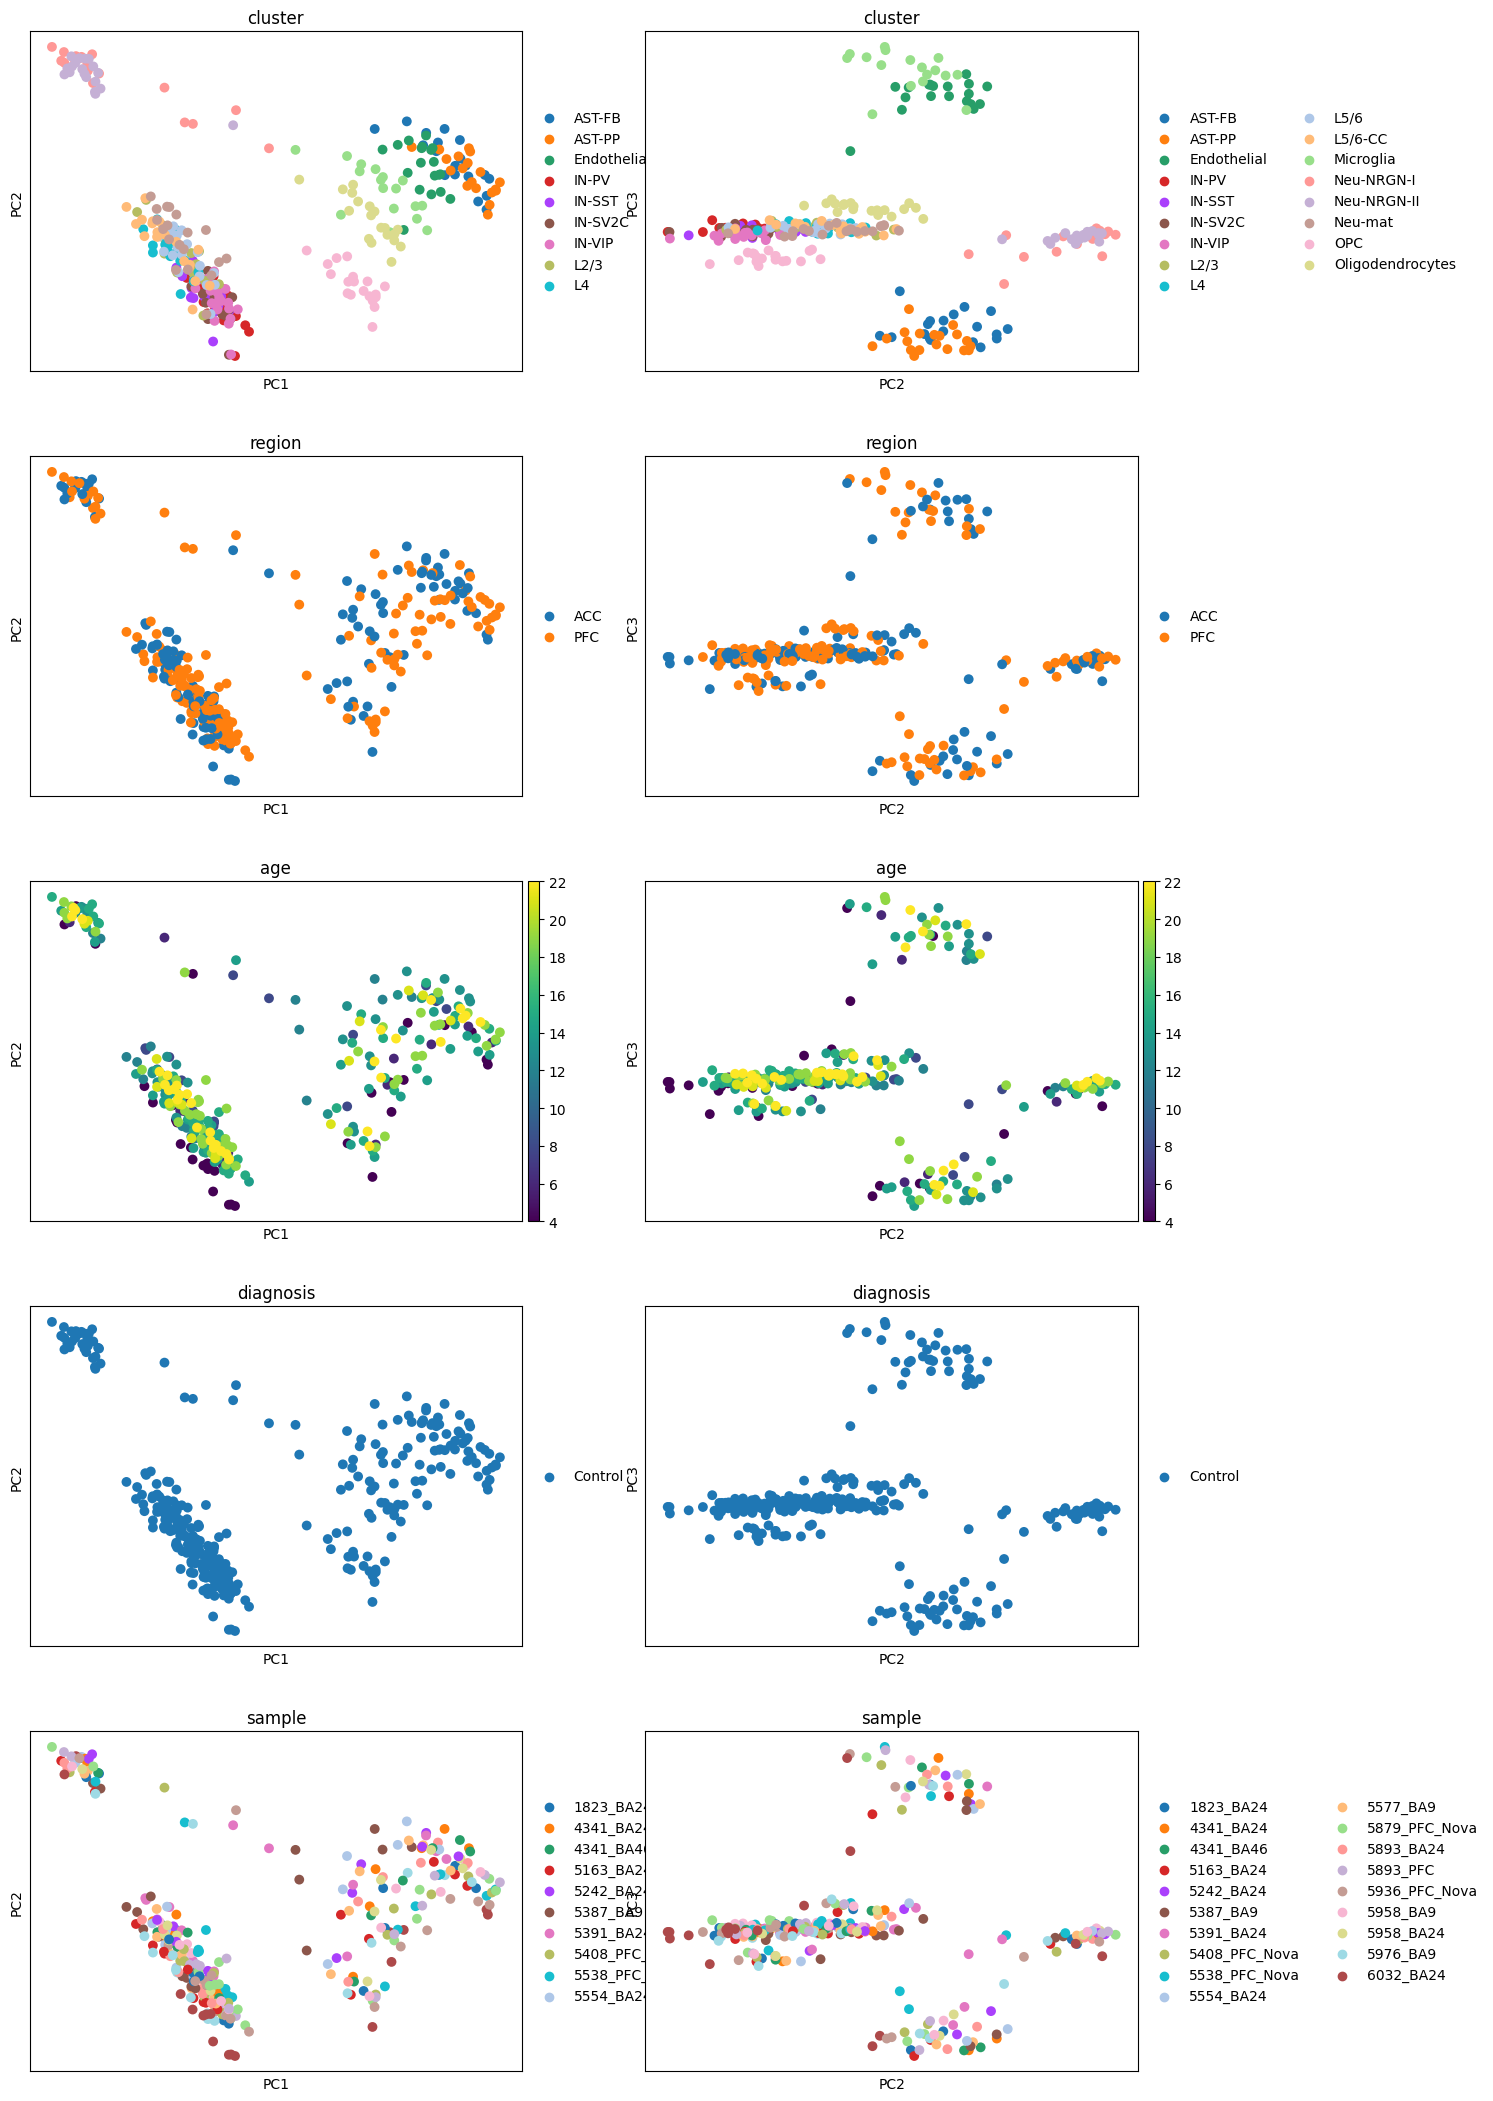

In [12]:
sc.pl.pca(adata_pb, color=['cluster', 'region', 'age', 'diagnosis', 'sample'], size=200, components=['1,2', '2,3'], ncols=2)

# Enrichment

## Rank genes

### Wilcoxon

d:\Projects\spatialMPFC\venv\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
d:\Projects\spatialMPFC\venv\lib\site-packages\scanpy\plotting\_tools\__init__.py:396: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(ymin, ymax)


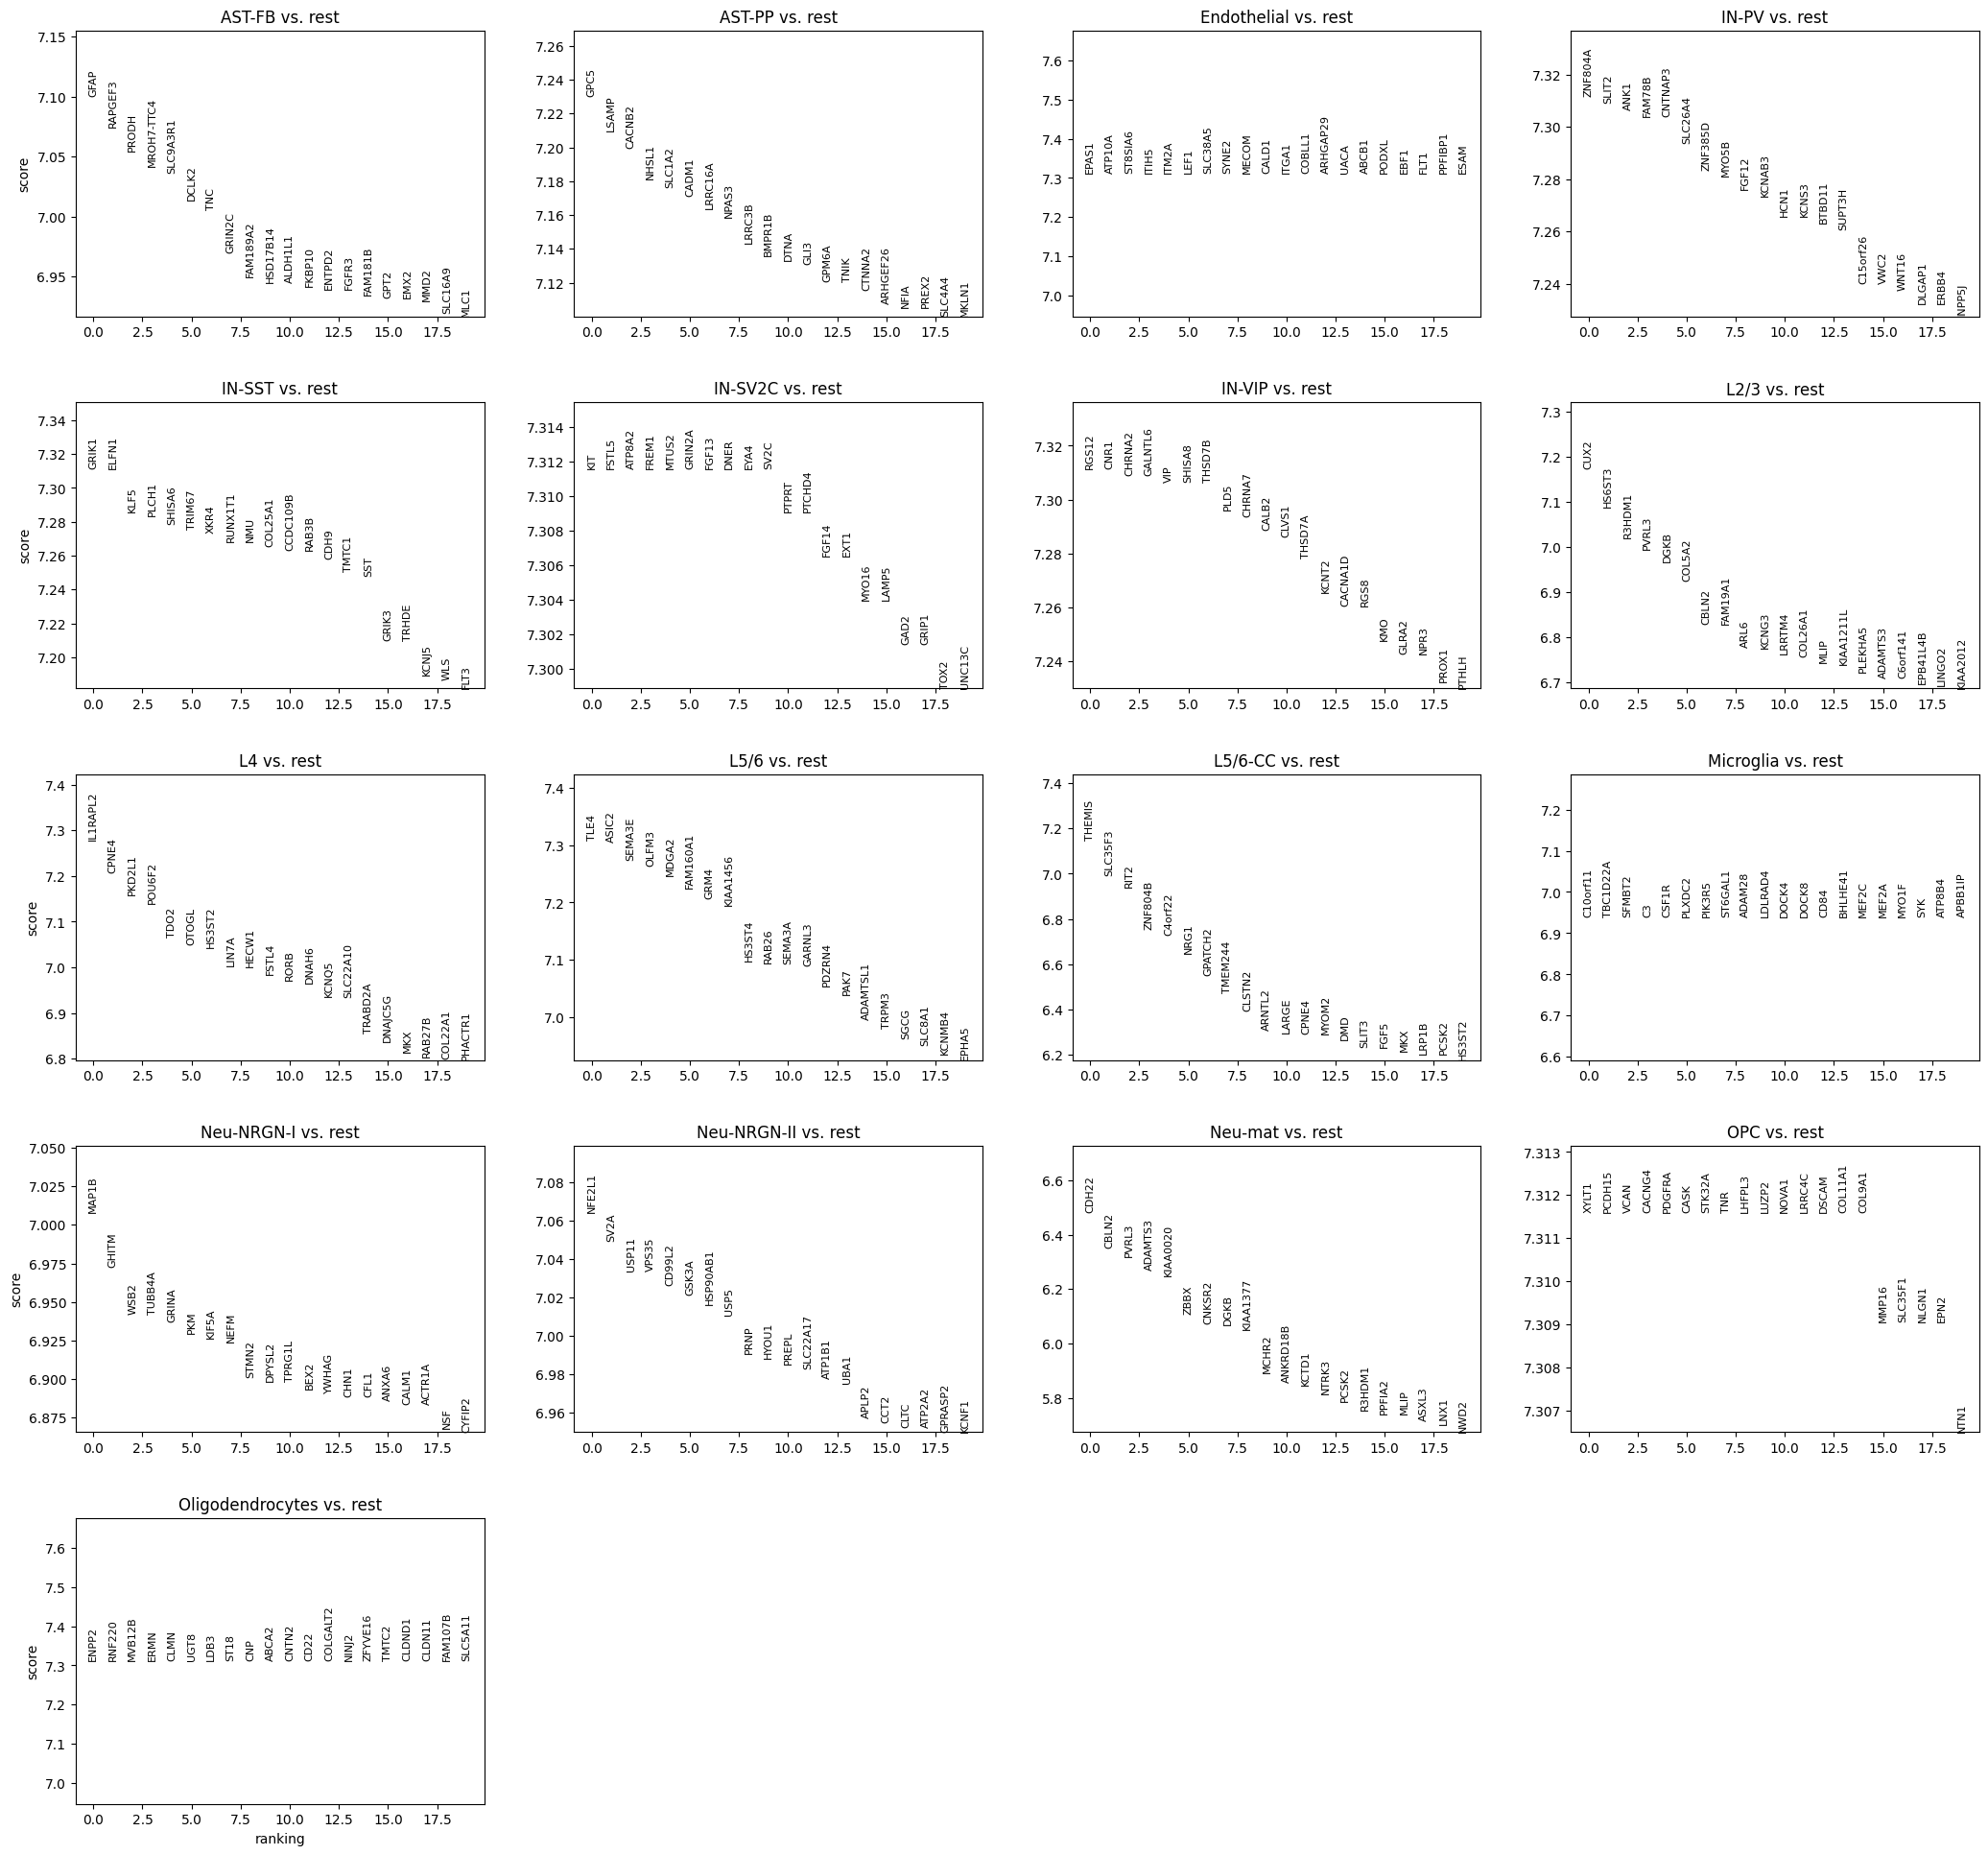

In [13]:
sc.tl.rank_genes_groups(adata_pb, 'cluster', method='wilcoxon', reference='rest', key_added="wilcoxon", pts=True)
sc.pl.rank_genes_groups(adata_pb, n_genes=20, sharey=False, key="wilcoxon")

d:\Projects\spatialMPFC\venv\lib\site-packages\scanpy\plotting\_anndata.py:1067: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if isinstance(groupby, str) and is_categorical_dtype(adata.obs[groupby]):
d:\Projects\spatialMPFC\venv\lib\site-packages\scanpy\tools\_dendrogram.py:105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[group]):
d:\Projects\spatialMPFC\venv\lib\site-packages\scanpy\tools\_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


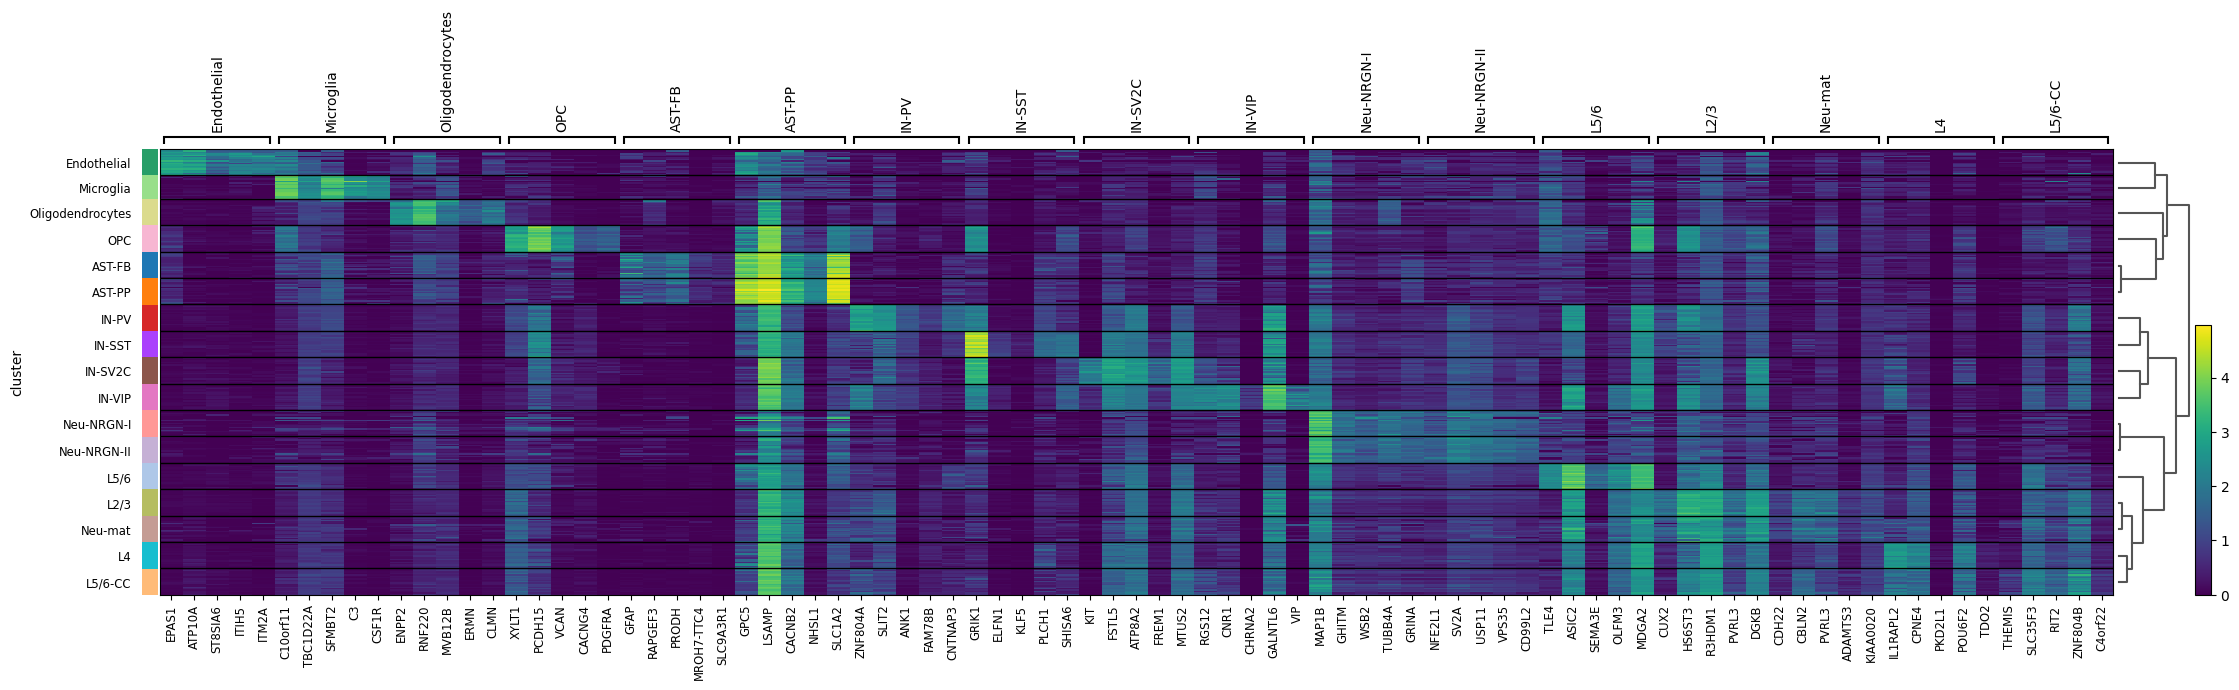

In [14]:
sc.pl.rank_genes_groups_heatmap(adata_pb, n_genes=5, key="wilcoxon", groupby="cluster", show_gene_labels=True)

d:\Projects\spatialMPFC\venv\lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


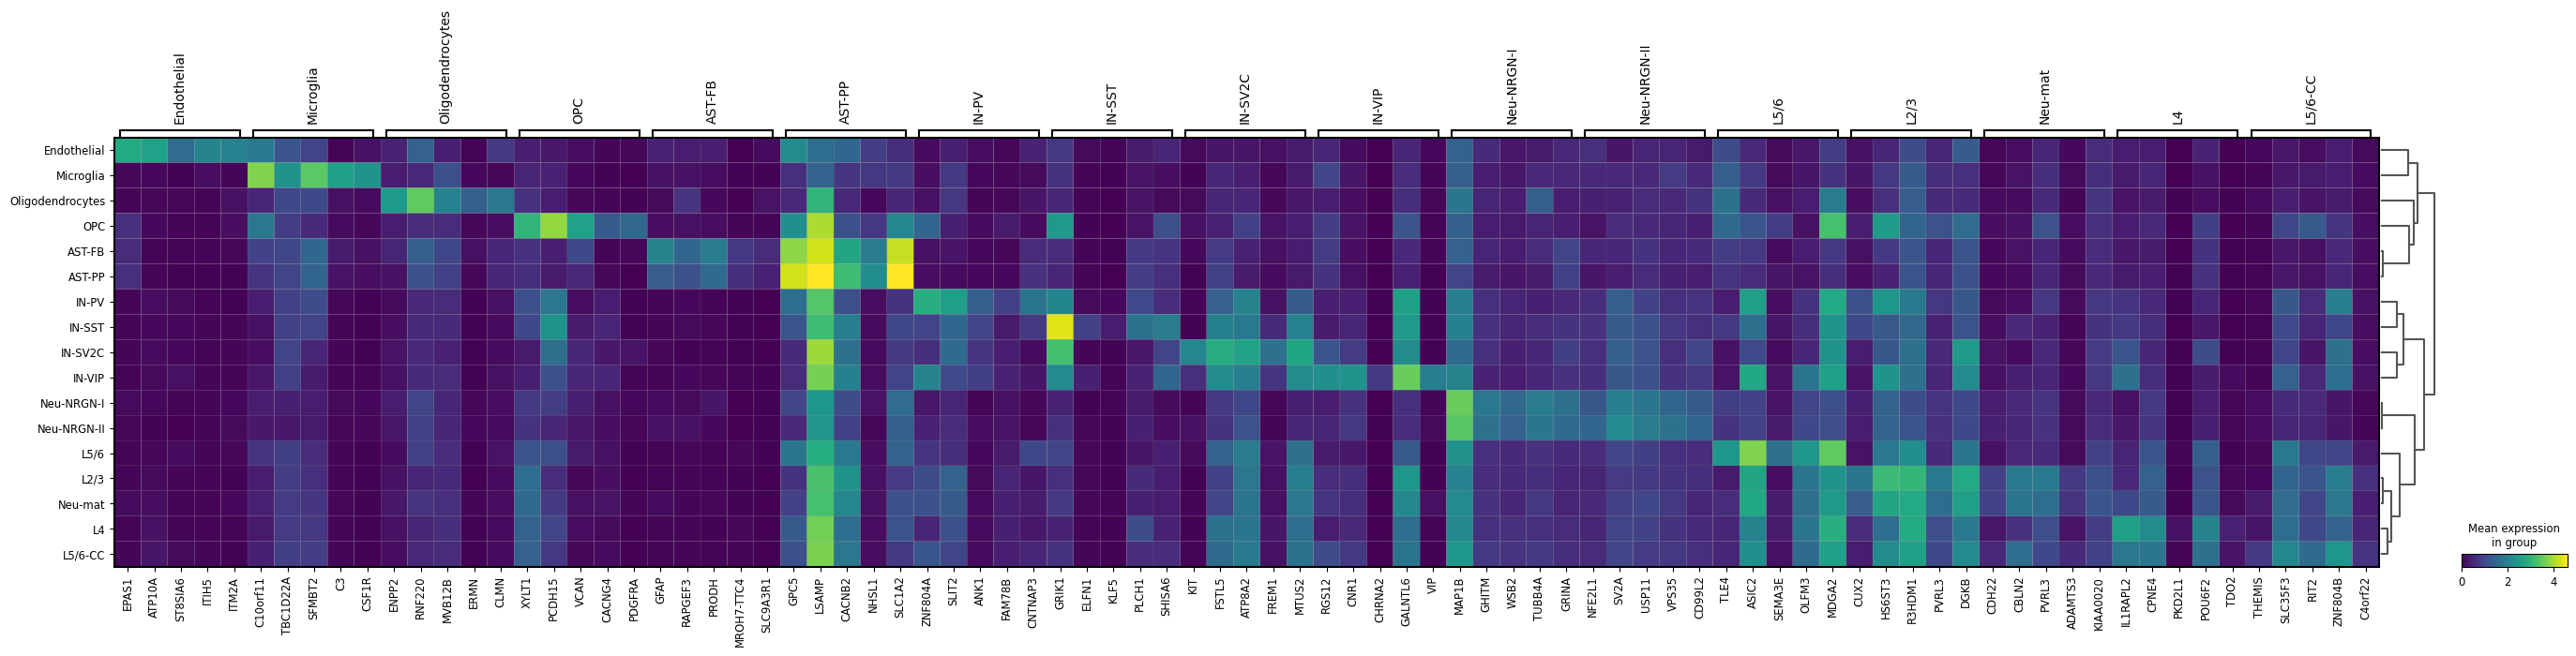

In [15]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="wilcoxon", groupby="cluster")

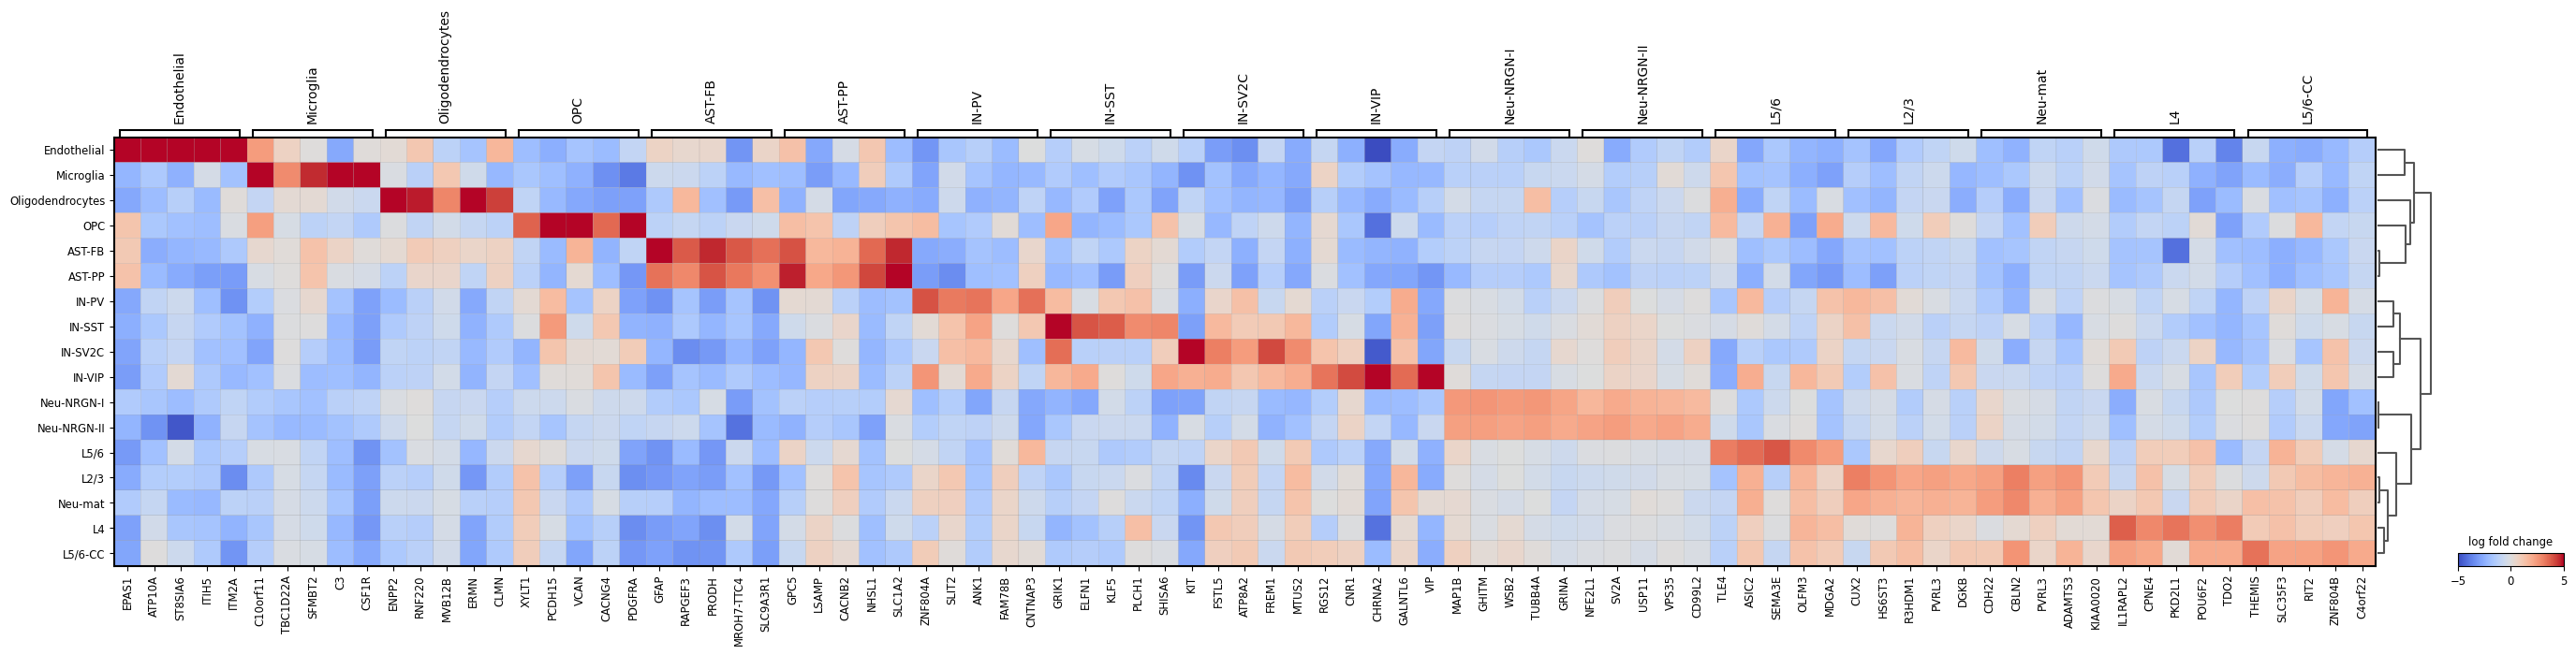

In [16]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="wilcoxon", groupby="cluster", vcenter=0, vmax=5, vmin=-5, values_to_plot='logfoldchanges', cmap='coolwarm')

### Logreg

d:\Projects\spatialMPFC\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


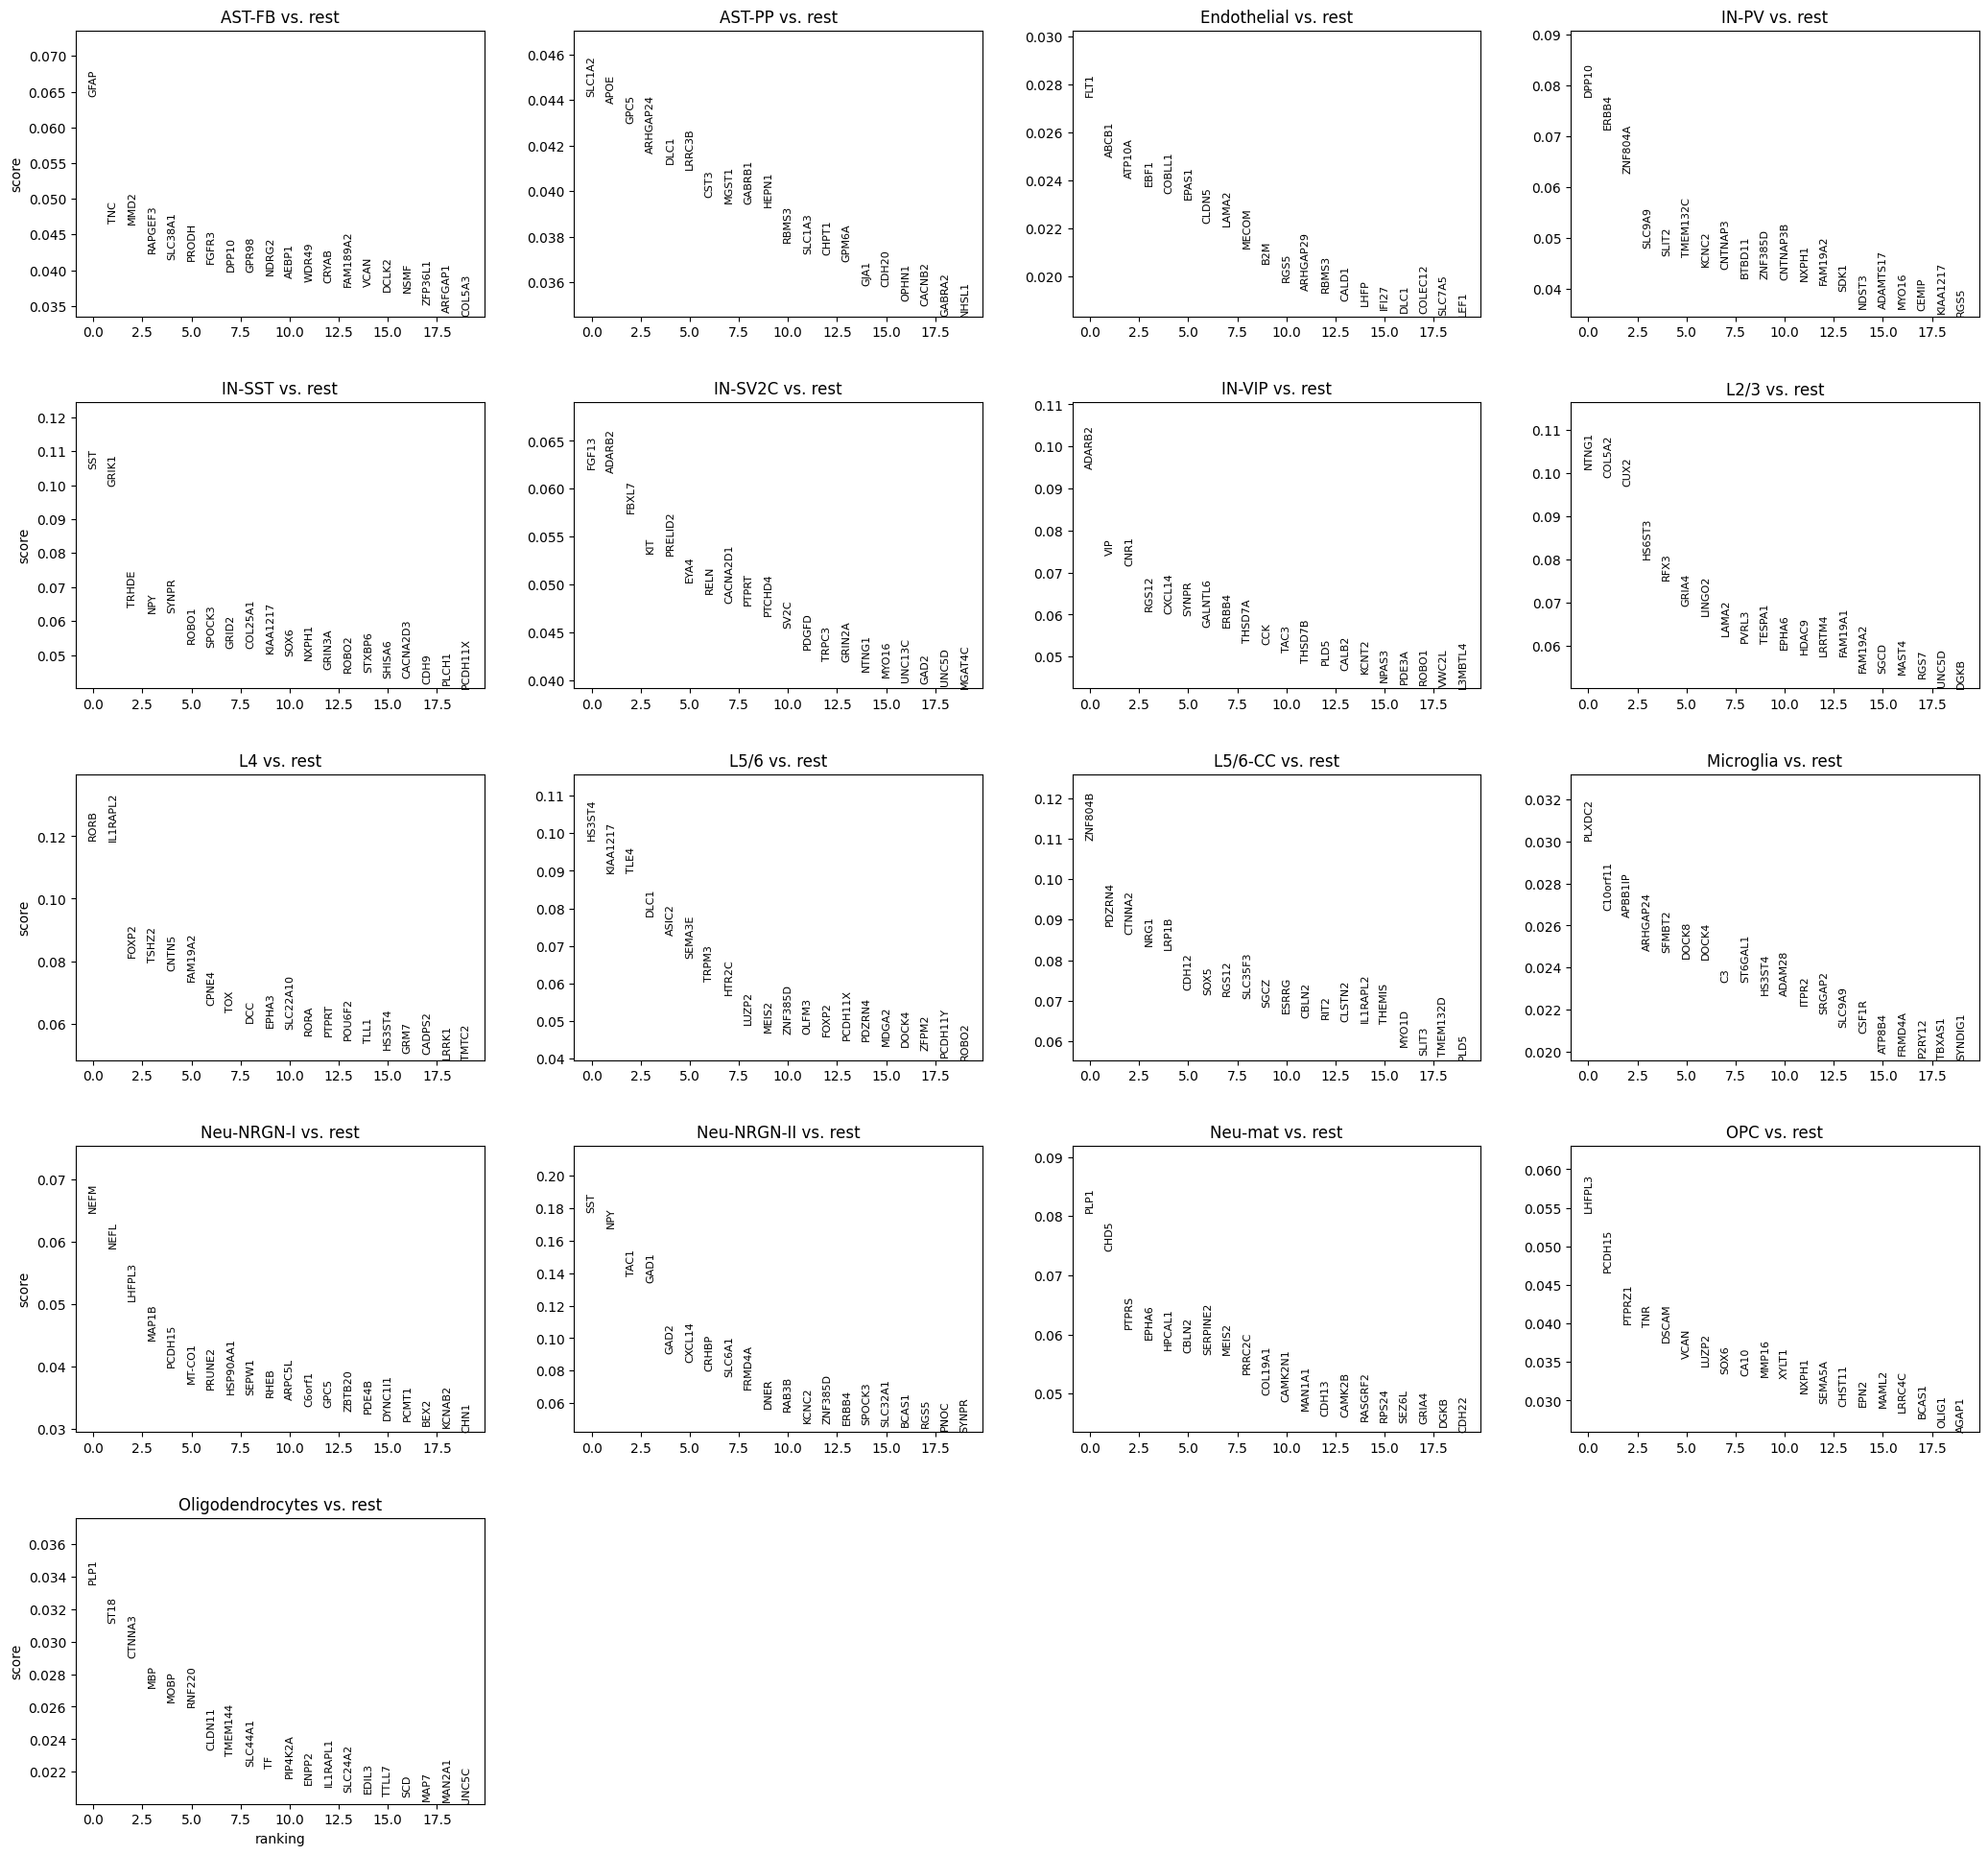

In [17]:
sc.tl.rank_genes_groups(adata_pb, 'cluster', method='logreg', reference='rest', key_added="logreg", pts=True)
sc.pl.rank_genes_groups(adata_pb, n_genes=20, sharey=False, key="logreg")

d:\Projects\spatialMPFC\venv\lib\site-packages\scanpy\plotting\_anndata.py:1067: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if isinstance(groupby, str) and is_categorical_dtype(adata.obs[groupby]):


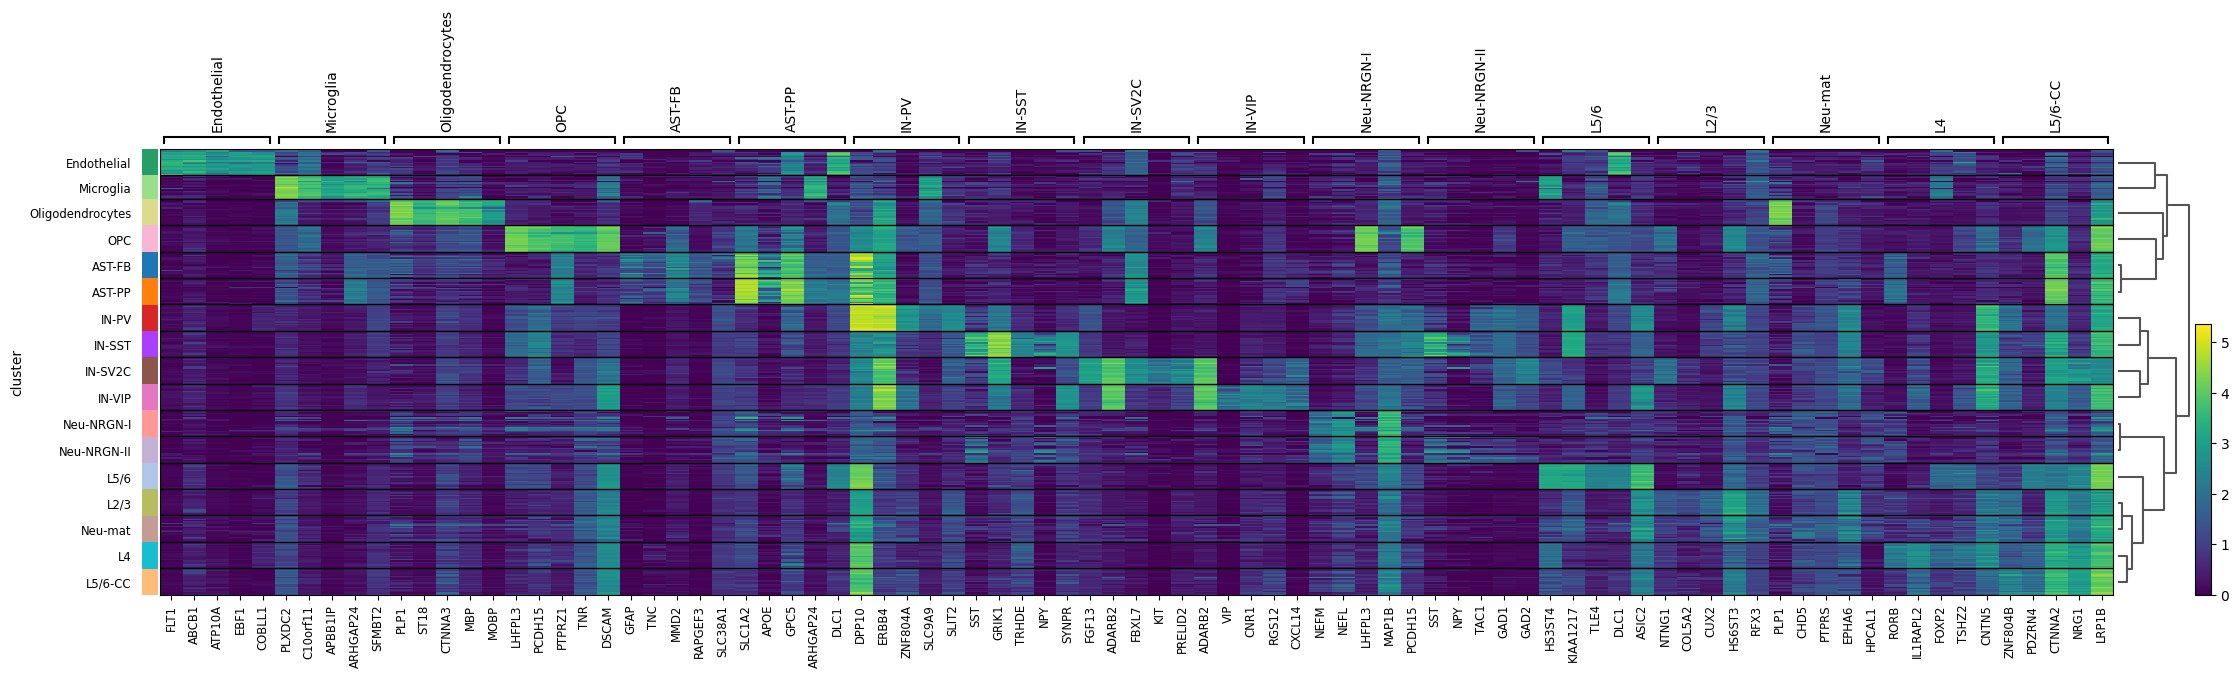

In [18]:
sc.pl.rank_genes_groups_heatmap(adata_pb, n_genes=5, key="logreg", groupby="cluster", show_gene_labels=True)

d:\Projects\spatialMPFC\venv\lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


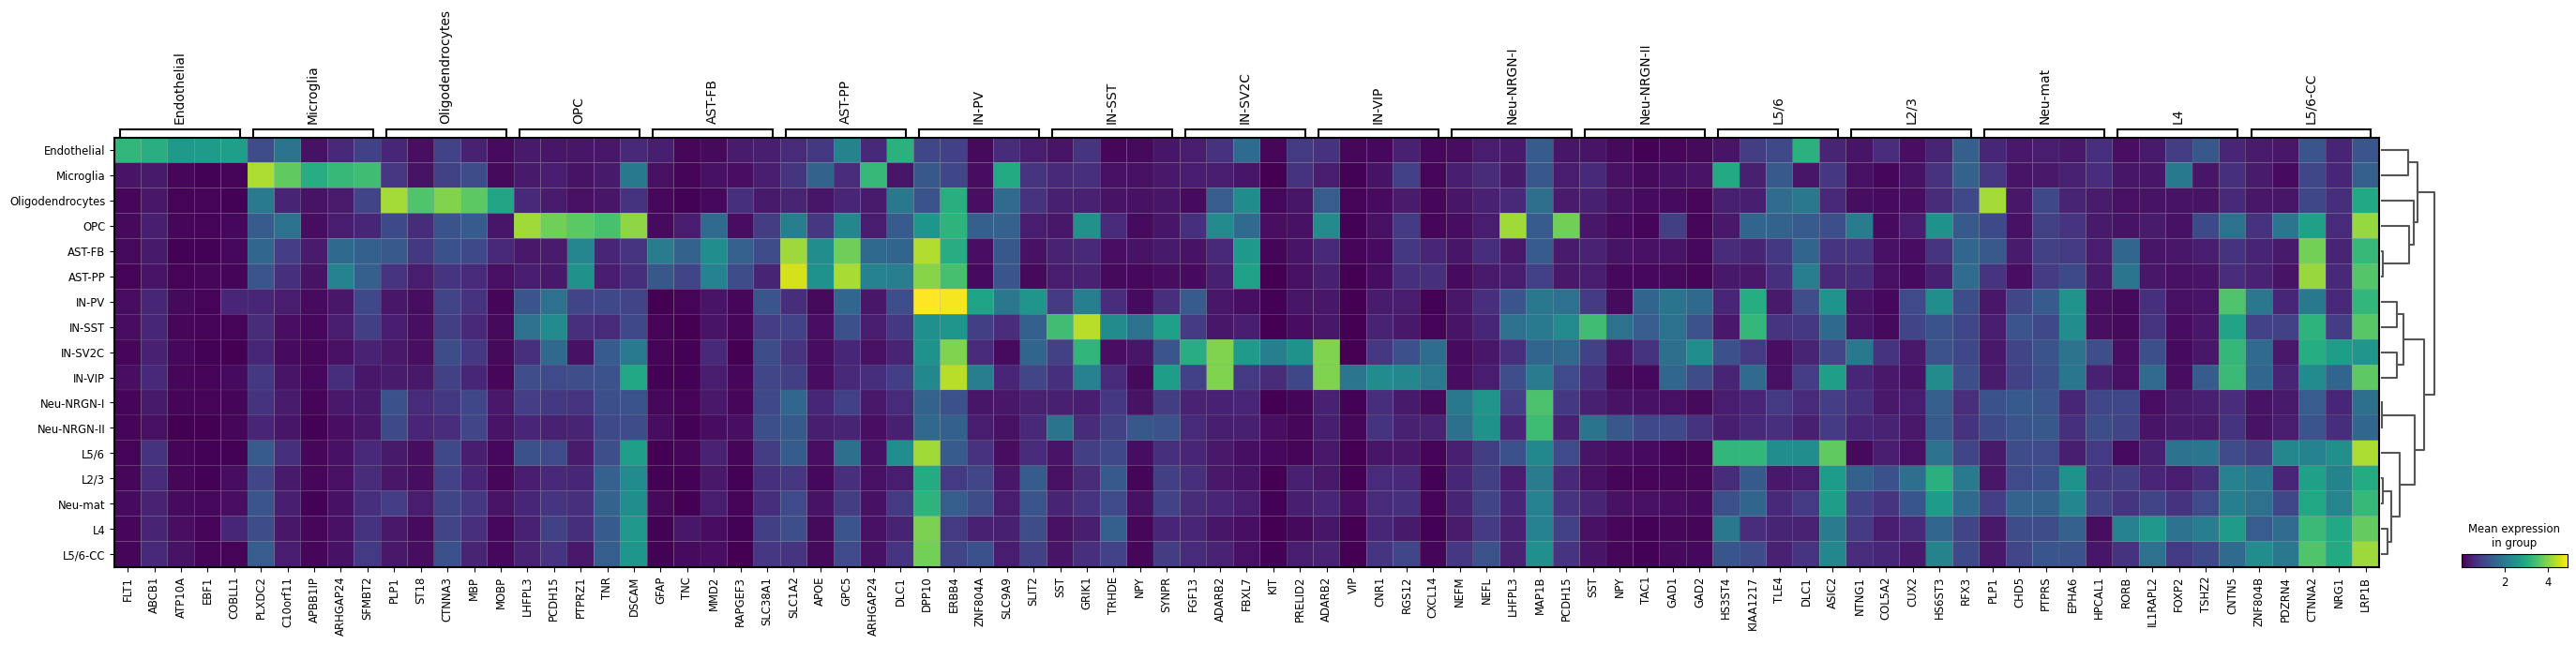

In [19]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="logreg", groupby="cluster")

### Save results

In [20]:
adata_pb.write_h5ad("../data/snRNAseq_data/pb_adata_diffexpr.h5ad")

## Enrich for HS/AS groups

In [21]:
hs_groups = pd.read_csv('../Specie-specific genes/results/age_hs_groups.csv', index_col=0)
hs_groups.head()

,label
LDHB,age-specific
NRXN2,age-specific
NDUFB10,age-specific
ZBTB46,age-specific
ASAP2,age-specific


### Wilcoxon

In [22]:
de_res = sc.get.rank_genes_groups_df(adata_pb, group='AST-PP', key='wilcoxon', pval_cutoff=None)
de_res.head()

,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference
0,GPC5,7.230058,4.727958,4.827896e-13,7.802368e-10,1.0,0.980132
1,LSAMP,7.209670,2.128308,5.608780e-13,7.802368e-10,1.0,0.993377
2,CACNB2,7.199476,2.543709,6.044455e-13,7.802368e-10,1.0,0.990066
3,NHSL1,7.181636,4.188607,6.888199e-13,7.802368e-10,1.0,0.897351
4,SLC1A2,7.176539,5.301605,7.149812e-13,7.802368e-10,1.0,0.973510


In [23]:
gene_rank = de_res[['names', 'scores']].set_index('names').sort_values('scores', ascending=False)
gene_rank.head()

,scores
names,
GPC5,7.230058
LSAMP,7.209670
CACNB2,7.199476
NHSL1,7.181636
SLC1A2,7.176539


In [24]:
adata_pb.var_names.intersection(hs_groups.index), adata_pb.var_names.intersection(hs_groups.index).size

(Index(['ALCAM', 'AMZ2', 'ASAH1', 'ASAP2', 'ATP1A3', 'CALR', 'CAMLG', 'CD47',
        'CHST10', 'CLSTN1', 'COTL1', 'CX3CL1', 'DLGAP4', 'ECSIT', 'EIF1B',
        'EIF3L', 'ERC1', 'ETFB', 'FBXO9', 'GAD1', 'GDE1', 'GNAI1', 'GPX4',
        'ID2', 'IGFBP2', 'IGFBP6', 'IGSF21', 'KIF21B', 'KLHL2', 'LDHB', 'LHX2',
        'LPL', 'MACF1', 'MAP1LC3B', 'MRPL51', 'NDUFB10', 'NDUFB7', 'NRXN1',
        'NRXN2', 'NUAK1', 'OLA1', 'PCP4', 'PDE1A', 'PES1', 'PPA1', 'PPP1CC',
        'PSMB7', 'PTPRK', 'RGS2', 'SCN3B', 'ST3GAL5', 'SULF2', 'SYNGAP1',
        'TCEAL4', 'TMED3', 'VAT1L', 'ZBTB18', 'ZBTB46', 'ZNF706'],
       dtype='object'),
 59)

In [25]:
age_dict = dict()
for label in hs_groups.label.unique():
  age_dict[label] = hs_groups[hs_groups.label == label].index.to_list()

In [26]:
cluster_names = adata_pb.obs.cluster.unique().to_list()
res_df_list = list()

for celltype in cluster_names:
  de_res = sc.get.rank_genes_groups_df(adata_pb, group=celltype, key='wilcoxon', pval_cutoff=None)
  #gene_rank = de_res[['names', 'scores']].set_index('names').sort_values('scores', ascending=False)
  #gene_rank = (de_res['logfoldchanges'].abs() * de_res['scores']).sort_values(ascending=False).to_frame()
  de_res = de_res.set_index('names')
  gene_rank = (de_res['logfoldchanges'].abs() * de_res['scores']).sort_values(ascending=False).to_frame()
  gsea_res = gseapy.prerank(rnk=gene_rank, # or rnk = rnk,
                      gene_sets=age_dict,
                      threads=4,
                      min_size=0,
                      max_size=1000,
                      permutation_num=1000, # reduce number to speed up testing
                      outdir=None, # don't write to disk
                      seed=4,
                      verbose=True, # see what's going on behind the scenes
                      )
  res_df = gsea_res.res2d
  res_df['celltype'] = celltype
  res_df_list.append(res_df)

C:\Users\aleks\AppData\Local\Temp\ipykernel_27084\769600625.py:1: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  cluster_names = adata_pb.obs.cluster.unique().to_list()
2024-04-02 11:52:15,114 [WARNING] Duplicated values found in preranked stats: 0.02% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-02 11:52:15,118 [INFO] Parsing data files for GSEA.............................
2024-04-02 11:52:15,130 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=0
2024-04-02 11:52:15,134 [INFO] 0004 gene_sets used for further statistical testing.....
2024-04-02 11:52:15,136 [INFO] Start to run GSEA...Might take a while..................


2024-04-02 11:52:19,726 [INFO] Congratulations. GSEApy runs successfully................

2024-04-02 11:52:19,992 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-02 11:52:19,994 [INFO] Parsing data files for GSEA.............................
2024-04-02 11:52:20,007 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=0
2024-04-02 11:52:20,012 [INFO] 0004 gene_sets used for further statistical testing.....
2024-04-02 11:52:20,014 [INFO] Start to run GSEA...Might take a while..................
2024-04-02 11:52:23,341 [INFO] Congratulations. GSEApy runs successfully................

2024-04-02 11:52:23,623 [WARNING] Duplicated values found in preranked stats: 0.04% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-02 11:52:23,626 [INFO] Parsing data files for GSEA.............................
2024-04-02 11:5

In [27]:
enrich_res = pd.concat(res_df_list, axis=0)
enrich_res['-log10(FDR)'] = -np.log10(enrich_res['FDR q-val'].astype(float) + 1e-3)
enrich_res['direction'] = enrich_res['ES'].map(lambda x: 'enriched' if x > 0 else 'depleted')
enrich_res['significant'] = enrich_res['FDR q-val'].map(lambda x: 'FDR < 0.05' if x < 0.05 else 'FDR >= 0.05')
enrich_res.head()

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,celltype,-log10(FDR),direction,significant
0,prerank,maybe age-specific,0.561031,1.169326,0.25,0.803493,0.328,3/15,4.14%,LHX2;MACF1;ID2,AST-FB,0.094477,enriched,FDR >= 0.05
1,prerank,human-specific,0.516117,0.939923,0.561224,0.824236,0.565,1/8,2.46%,AMZ2,AST-FB,0.083422,enriched,FDR >= 0.05
2,prerank,maybe human-specific,0.371301,0.717693,0.831135,0.84425,0.751,4/10,15.48%,CHST10;ALCAM;KIF21B;CALR,AST-FB,0.073015,enriched,FDR >= 0.05
3,prerank,age-specific,-0.32426,-0.599702,0.938942,0.915461,0.986789,6/26,16.02%,GNAI1;PDE1A;ATP1A3;PPA1;NRXN2;CX3CL1,AST-FB,0.037886,depleted,FDR >= 0.05
0,prerank,human-specific,0.617925,1.165635,0.322034,0.551263,0.325,1/8,2.70%,AMZ2,AST-PP,0.257854,enriched,FDR >= 0.05


d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

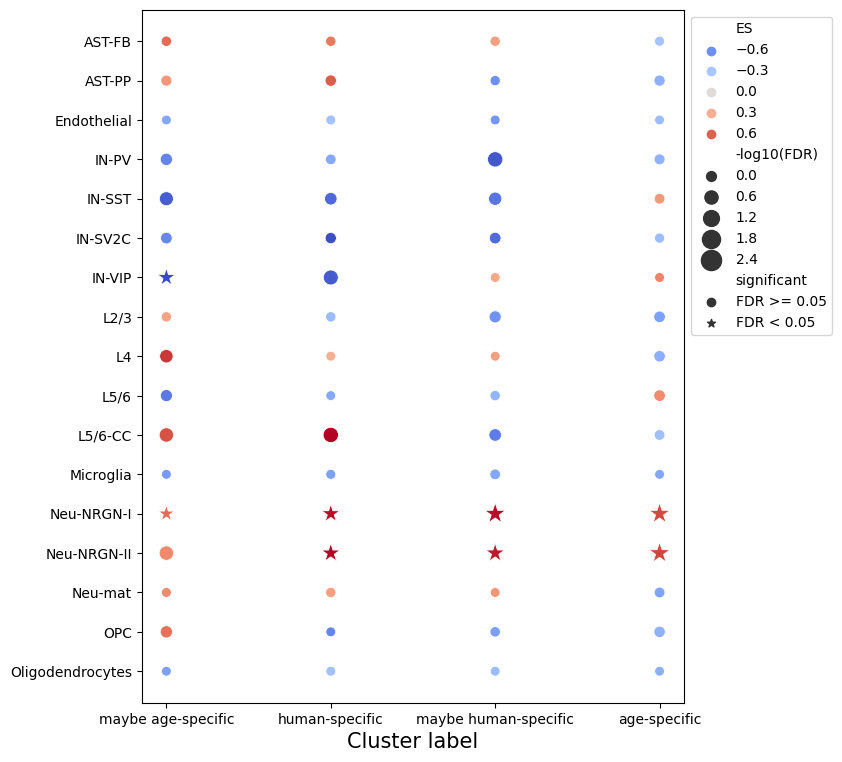

In [28]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 9), dpi=100)
palette = sns.color_palette("coolwarm", as_cmap=True)


ax = sns.scatterplot(
    data=enrich_res.reset_index(),
    x='Term',
    y='celltype',
    size='-log10(FDR)',
    sizes=(50, 250),
    hue='ES',
    palette=palette,
    style='significant',
    markers={'FDR < 0.05': '*', 'FDR >= 0.05': 'o'}
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
#ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

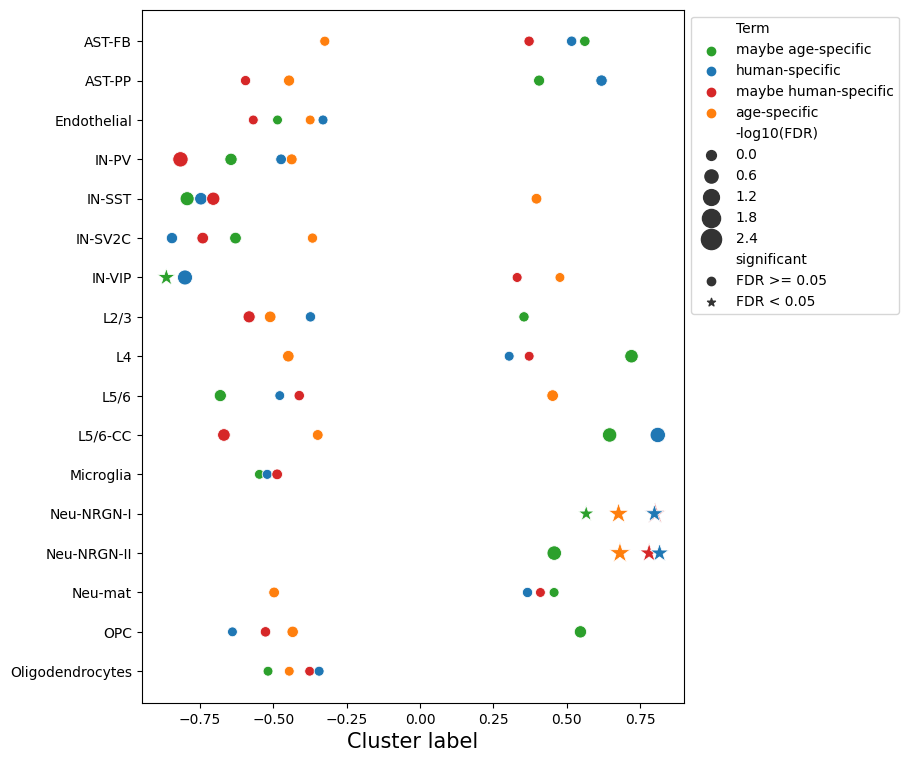

In [29]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 9), dpi=100)
color_dict_labels = {'human-specific': 'tab:blue', 'age-specific': 'tab:orange', 'maybe human-specific': 'tab:red', 'maybe age-specific': 'tab:green'}

ax = sns.scatterplot(
    data=enrich_res.reset_index(),
    x='ES',
    y='celltype',
    size='-log10(FDR)',
    sizes=(50, 250),
    hue='Term',
    palette=color_dict_labels,
    style='significant',
    markers={'FDR < 0.05': '*', 'FDR >= 0.05': 'o'}
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
#ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

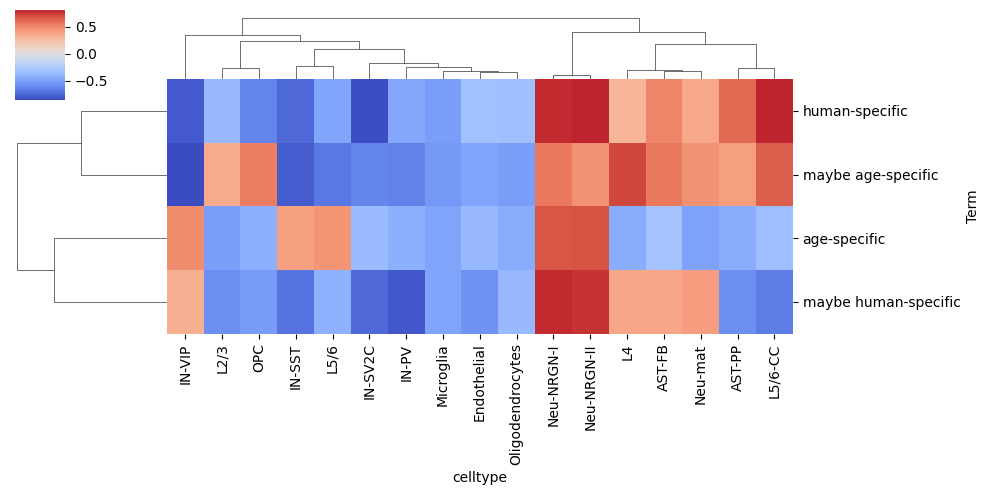

In [30]:
import seaborn as sns
es_df = enrich_res.pivot(index='Term', columns='celltype', values='ES')
sns.clustermap(es_df.astype(float), figsize=(10, 5), cmap='coolwarm', center=0)

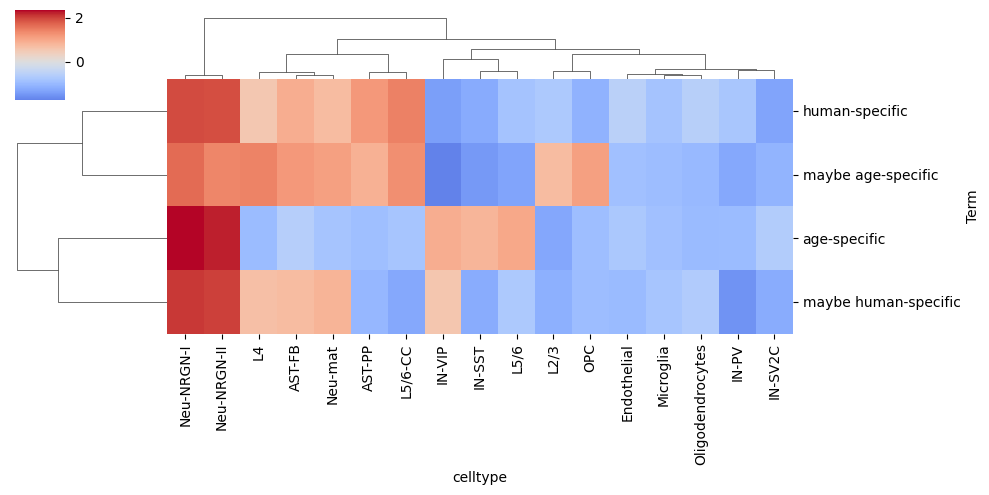

In [31]:
es_df = enrich_res.pivot(index='Term', columns='celltype', values='NES')
sns.clustermap(es_df.astype(float), figsize=(10, 5), cmap='coolwarm', center=0)

### Logreg

In [32]:
de_res = sc.get.rank_genes_groups_df(adata_pb, group='AST-PP', key='logreg', pval_cutoff=None)
de_res.head()

,names,scores
0,SLC1A2,0.044149
1,APOE,0.043876
2,GPC5,0.042988
3,ARHGAP24,0.041660
4,DLC1,0.041221


In [33]:
gene_rank = de_res[['names', 'scores']].set_index('names').sort_values('scores', ascending=False)
gene_rank.head()

,scores
names,
SLC1A2,0.044149
APOE,0.043876
GPC5,0.042988
ARHGAP24,0.041660
DLC1,0.041221


In [34]:
adata_pb.var_names.intersection(hs_groups.index), adata_pb.var_names.intersection(hs_groups.index).size

(Index(['ALCAM', 'AMZ2', 'ASAH1', 'ASAP2', 'ATP1A3', 'CALR', 'CAMLG', 'CD47',
        'CHST10', 'CLSTN1', 'COTL1', 'CX3CL1', 'DLGAP4', 'ECSIT', 'EIF1B',
        'EIF3L', 'ERC1', 'ETFB', 'FBXO9', 'GAD1', 'GDE1', 'GNAI1', 'GPX4',
        'ID2', 'IGFBP2', 'IGFBP6', 'IGSF21', 'KIF21B', 'KLHL2', 'LDHB', 'LHX2',
        'LPL', 'MACF1', 'MAP1LC3B', 'MRPL51', 'NDUFB10', 'NDUFB7', 'NRXN1',
        'NRXN2', 'NUAK1', 'OLA1', 'PCP4', 'PDE1A', 'PES1', 'PPA1', 'PPP1CC',
        'PSMB7', 'PTPRK', 'RGS2', 'SCN3B', 'ST3GAL5', 'SULF2', 'SYNGAP1',
        'TCEAL4', 'TMED3', 'VAT1L', 'ZBTB18', 'ZBTB46', 'ZNF706'],
       dtype='object'),
 59)

In [35]:
age_dict = dict()
for label in hs_groups.label.unique():
  age_dict[label] = hs_groups[hs_groups.label == label].index.to_list()

In [36]:
cluster_names = adata_pb.obs.cluster.unique().to_list()
res_df_list = list()

for celltype in cluster_names:
  de_res = sc.get.rank_genes_groups_df(adata_pb, group=celltype, key='logreg', pval_cutoff=None)
  gene_rank = de_res.set_index('names').sort_values('scores', ascending=False)
  gsea_res = gseapy.prerank(rnk=gene_rank, # or rnk = rnk,
                      gene_sets=age_dict,
                      threads=4,
                      min_size=0,
                      max_size=1000,
                      permutation_num=1000, # reduce number to speed up testing
                      outdir=None, # don't write to disk
                      seed=4,
                      verbose=True, # see what's going on behind the scenes
                      )
  res_df = gsea_res.res2d
  res_df['celltype'] = celltype
  res_df_list.append(res_df)

C:\Users\aleks\AppData\Local\Temp\ipykernel_27084\742398801.py:1: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  cluster_names = adata_pb.obs.cluster.unique().to_list()
2024-04-02 11:53:25,455 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-02 11:53:25,458 [INFO] Parsing data files for GSEA.............................
2024-04-02 11:53:25,470 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=0
2024-04-02 11:53:25,475 [INFO] 0004 gene_sets used for further statistical testing.....


2024-04-02 11:53:25,477 [INFO] Start to run GSEA...Might take a while..................
2024-04-02 11:53:29,094 [INFO] Congratulations. GSEApy runs successfully................

2024-04-02 11:53:29,210 [INFO] Parsing data files for GSEA.............................
2024-04-02 11:53:29,223 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=0
2024-04-02 11:53:29,227 [INFO] 0004 gene_sets used for further statistical testing.....
2024-04-02 11:53:29,230 [INFO] Start to run GSEA...Might take a while..................
2024-04-02 11:53:32,793 [INFO] Congratulations. GSEApy runs successfully................

2024-04-02 11:53:32,906 [INFO] Parsing data files for GSEA.............................
2024-04-02 11:53:32,919 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=0
2024-04-02 11:53:32,923 [INFO] 0004 gene_sets used for further statistical testing.....
2024-04-02 11:53:32,925 [INFO] Start to run GSEA...Might take a while.................

In [37]:
enrich_res = pd.concat(res_df_list, axis=0)
enrich_res['-log10(FDR)'] = -np.log10(enrich_res['FDR q-val'].astype(float) + 1e-3)
enrich_res['direction'] = enrich_res['ES'].map(lambda x: 'enriched' if x > 0 else 'depleted')
enrich_res['significant'] = enrich_res['FDR q-val'].map(lambda x: 'FDR < 0.05' if x < 0.05 else 'FDR >= 0.05')
enrich_res.head()

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,celltype,-log10(FDR),direction,significant
0,prerank,maybe human-specific,0.556487,1.201661,0.263959,0.736453,0.472,5/10,17.94%,NDUFB7;CHST10;KIF21B;NUAK1;SCN3B,AST-FB,0.132266,enriched,FDR >= 0.05
1,prerank,human-specific,-0.529618,-1.184336,0.285036,0.246803,0.390643,2/8,8.16%,ASAH1;IGFBP6,AST-FB,0.605893,depleted,FDR >= 0.05
2,prerank,maybe age-specific,0.427491,0.997682,0.472269,0.698892,0.727,3/15,8.47%,MACF1;LHX2;ID2,AST-FB,0.154969,enriched,FDR >= 0.05
3,prerank,age-specific,0.360652,0.978169,0.467958,0.488506,0.752,10/26,20.56%,SYNGAP1;ETFB;NDUFB10;GAD1;CLSTN1;ZBTB18;ZBTB46...,AST-FB,0.310242,enriched,FDR >= 0.05
0,prerank,age-specific,-0.453855,-1.246234,0.17103,0.599199,0.386694,12/26,10.55%,SYNGAP1;PDE1A;CLSTN1;ATP1A3;GAD1;CX3CL1;DLGAP4...,AST-PP,0.221705,depleted,FDR >= 0.05


d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

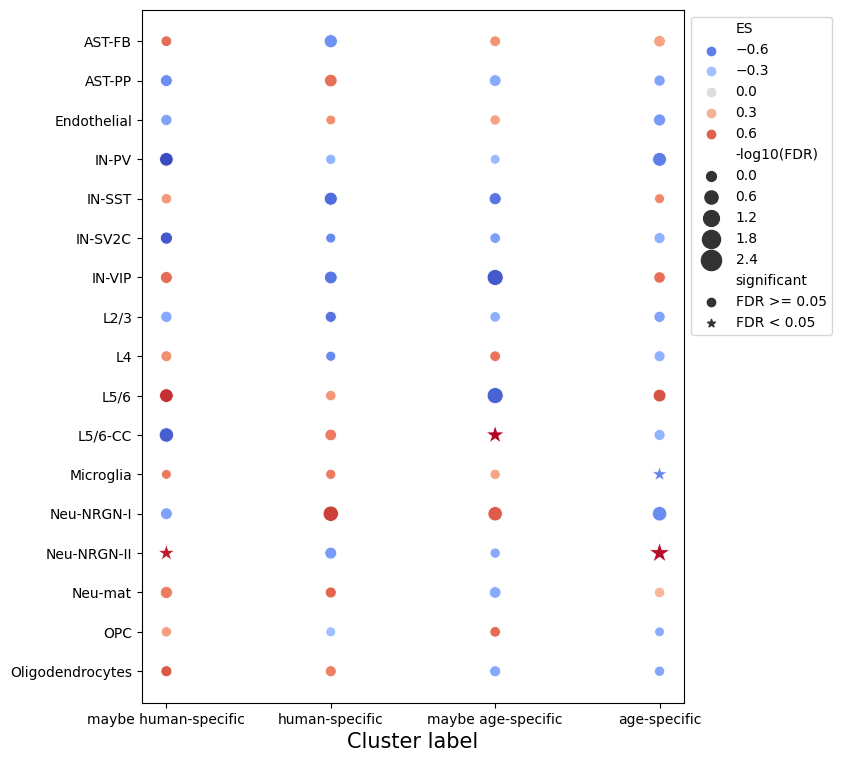

In [38]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 9), dpi=100)
palette = sns.color_palette("coolwarm", as_cmap=True)


ax = sns.scatterplot(
    data=enrich_res.reset_index(),
    x='Term',
    y='celltype',
    size='-log10(FDR)',
    sizes=(50, 250),
    hue='ES',
    palette=palette,
    style='significant',
    markers={'FDR < 0.05': '*', 'FDR >= 0.05': 'o'}
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
#ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

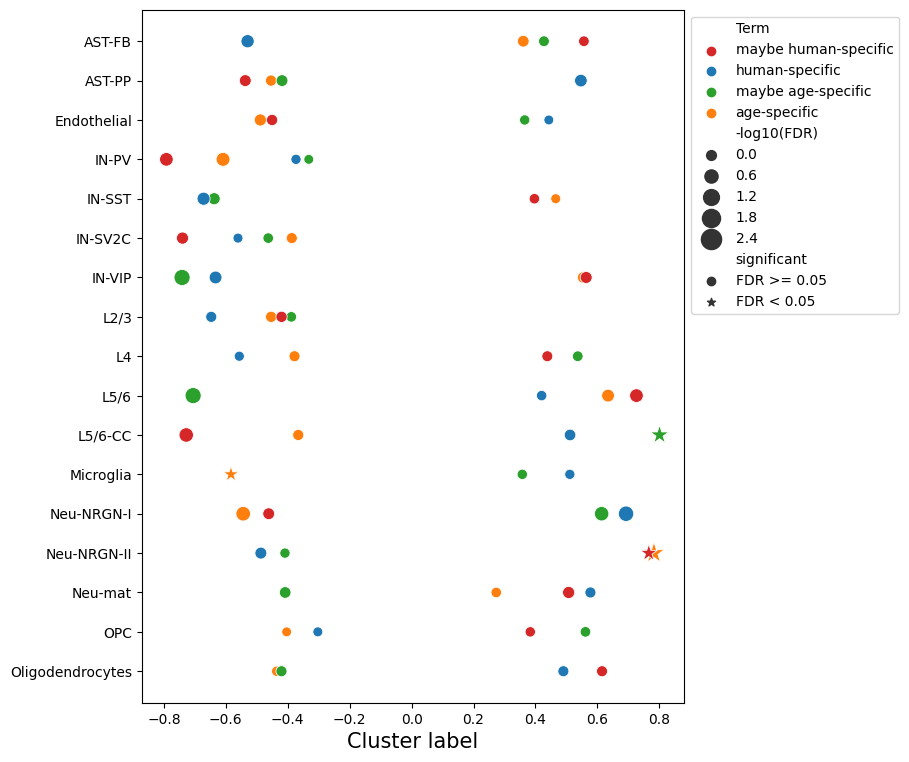

In [39]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 9), dpi=100)
color_dict_labels = {'human-specific': 'tab:blue', 'age-specific': 'tab:orange', 'maybe human-specific': 'tab:red', 'maybe age-specific': 'tab:green'}

ax = sns.scatterplot(
    data=enrich_res.reset_index(),
    x='ES',
    y='celltype',
    size='-log10(FDR)',
    sizes=(50, 250),
    hue='Term',
    palette=color_dict_labels,
    style='significant',
    markers={'FDR < 0.05': '*', 'FDR >= 0.05': 'o'}
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
#ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

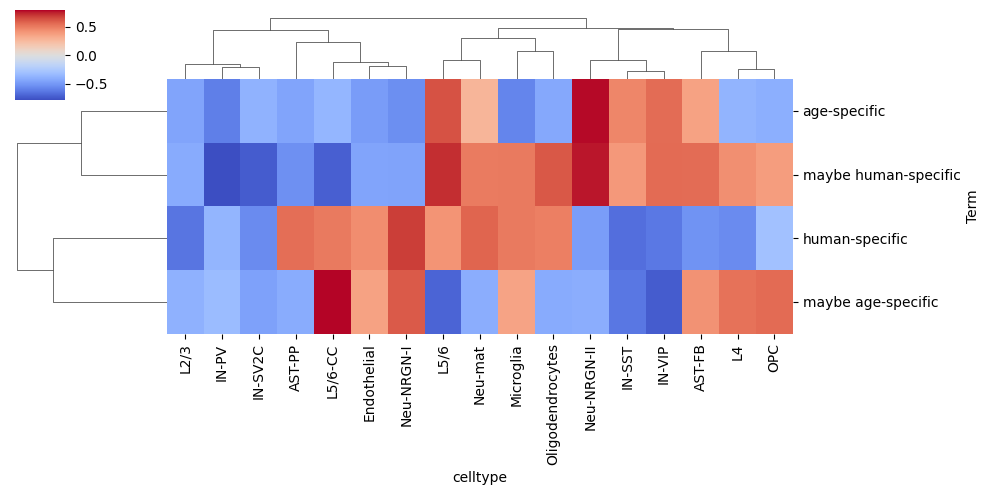

In [40]:
import seaborn as sns
es_df = enrich_res.pivot(index='Term', columns='celltype', values='ES')
sns.clustermap(es_df.astype(float), figsize=(10, 5), cmap='coolwarm', center=0)

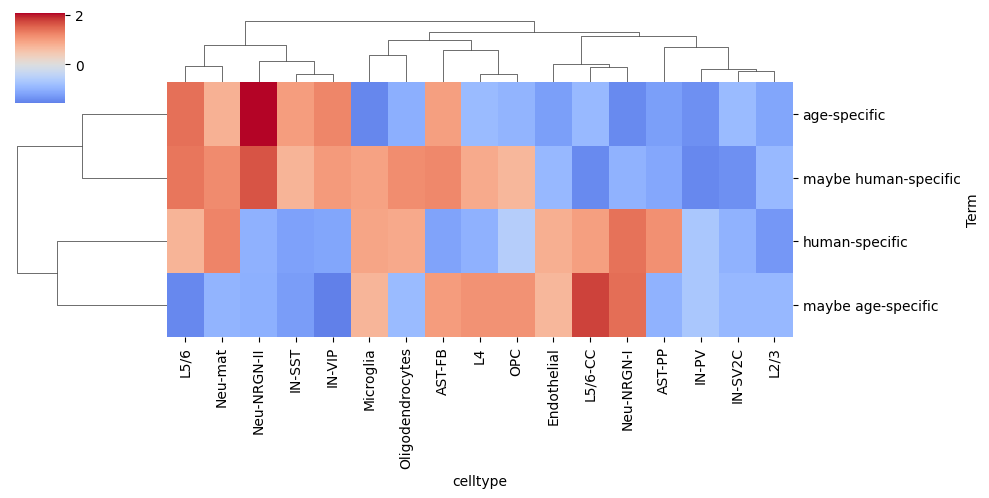

In [41]:
es_df = enrich_res.pivot(index='Term', columns='celltype', values='NES')
sns.clustermap(es_df.astype(float), figsize=(10, 5), cmap='coolwarm', center=0)

## Enrich for clusters

In [42]:
cluster_groups = pd.read_csv('../Specie-specific genes/results/human_clusters_edgeR_6.csv', index_col=0)
cluster_groups.head()

,0
LPL,0
SCN3B,0
RGS2,0
KIF21B,0
ST3GAL5,0


In [43]:
cluster_dict = dict()
for label in cluster_groups['0'].unique():
  cluster_dict[f'clust{label}'] = cluster_groups[cluster_groups['0'] == label].index.to_list()

### Wilcoxon

In [44]:
de_res = sc.get.rank_genes_groups_df(adata_pb, group='AST-PP', key='wilcoxon', pval_cutoff=None)
de_res = de_res.set_index('names')
gene_rank = (de_res['logfoldchanges'].abs() * de_res['scores']).sort_values(ascending=False).to_frame()
gene_rank

,0
names,
SLC1A2,38.047180
GPR98,36.742142
SLC1A3,35.836590
GJA1,35.054508
AQP4,34.469387
...,...
KRT222,-96.347443
ONECUT2,-99.044800
F11R,-99.082794


In [45]:
cluster_names = adata_pb.obs.cluster.unique().to_list()
res_df_list = list()

for celltype in cluster_names:
  de_res = sc.get.rank_genes_groups_df(adata_pb, group=celltype, key='wilcoxon', pval_cutoff=None)
  de_res = de_res.set_index('names')
  gene_rank = (de_res['logfoldchanges'].abs() * de_res['scores']).sort_values(ascending=False).to_frame()
  #gene_rank = de_res[['names', 'logfoldchanges']].set_index('names').sort_values('logfoldchanges', ascending=False)
  gsea_res = gseapy.prerank(rnk=gene_rank, # or rnk = rnk,
                      gene_sets=cluster_dict,
                      threads=4,
                      min_size=0,
                      max_size=1000,
                      permutation_num=1000, # reduce number to speed up testing
                      outdir=None, # don't write to disk
                      seed=4,
                      verbose=True, # see what's going on behind the scenes
                      )

  res_df = gsea_res.res2d
  res_df['celltype'] = celltype
  res_df_list.append(res_df)

C:\Users\aleks\AppData\Local\Temp\ipykernel_27084\901722825.py:1: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  cluster_names = adata_pb.obs.cluster.unique().to_list()
2024-04-02 11:54:33,096 [WARNING] Duplicated values found in preranked stats: 0.02% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-02 11:54:33,099 [INFO] Parsing data files for GSEA.............................
2024-04-02 11:54:33,115 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=0
2024-04-02 11:54:33,119 [INFO] 0006 gene_sets used for further statistical testing.....
2024-04-02 11:54:33,122 [INFO] Start to run GSEA...Might take a while..................


2024-04-02 11:54:37,297 [INFO] Congratulations. GSEApy runs successfully................

2024-04-02 11:54:37,553 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-02 11:54:37,556 [INFO] Parsing data files for GSEA.............................
2024-04-02 11:54:37,565 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=0
2024-04-02 11:54:37,569 [INFO] 0006 gene_sets used for further statistical testing.....
2024-04-02 11:54:37,572 [INFO] Start to run GSEA...Might take a while..................
2024-04-02 11:54:41,134 [INFO] Congratulations. GSEApy runs successfully................

2024-04-02 11:54:41,393 [WARNING] Duplicated values found in preranked stats: 0.04% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-02 11:54:41,396 [INFO] Parsing data files for GSEA.............................
2024-04-02 11:5

In [46]:
enrich_res = pd.concat(res_df_list, axis=0)
enrich_res['-log10(FDR)'] = -np.log10(enrich_res['FDR q-val'].astype(float) + 1e-3)
enrich_res['direction'] = enrich_res['ES'].map(lambda x: 'enriched' if x > 0 else 'depleted')
enrich_res['significant'] = enrich_res['FDR q-val'].map(lambda x: 'FDR < 0.05' if x < 0.05 else 'FDR >= 0.05')
enrich_res.head()

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,celltype,-log10(FDR),direction,significant
0,prerank,clust1,0.752565,1.522245,0.035608,0.068783,0.051,2/13,5.11%,AMZ2;ASAP2,AST-FB,1.156250,enriched,FDR >= 0.05
1,prerank,clust5,0.694199,1.233181,0.245524,0.345238,0.414,4/8,9.91%,LHX2;CHST10;ETFB;COTL1,AST-FB,0.460625,enriched,FDR >= 0.05
2,prerank,clust2,-0.72306,-1.143794,0.347334,1.0,0.782347,4/7,16.02%,GNAI1;NUAK1;PPA1;CX3CL1,AST-FB,-0.000434,depleted,FDR >= 0.05
3,prerank,clust3,0.561765,0.99547,0.491686,0.487213,0.698,2/7,4.14%,MACF1;ID2,AST-FB,0.311390,enriched,FDR >= 0.05
4,prerank,clust4,-0.58235,-0.918223,0.623711,0.918006,0.950853,4/8,22.84%,IGSF21;ATP1A3;VAT1L;CD47,AST-FB,0.036681,depleted,FDR >= 0.05


d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

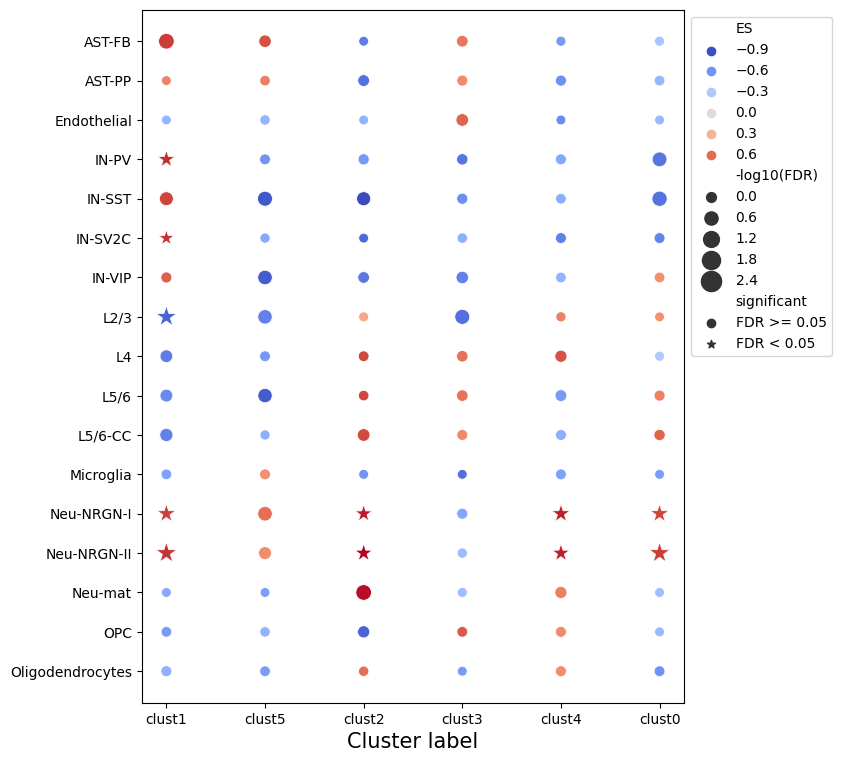

In [47]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 9), dpi=100)
palette = sns.color_palette("coolwarm", as_cmap=True)


ax = sns.scatterplot(
    data=enrich_res.reset_index(),
    x='Term',
    y='celltype',
    size='-log10(FDR)',
    sizes=(50, 250),
    hue='ES',
    palette=palette,
    style='significant',
    markers={'FDR < 0.05': '*', 'FDR >= 0.05': 'o'}
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
#ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

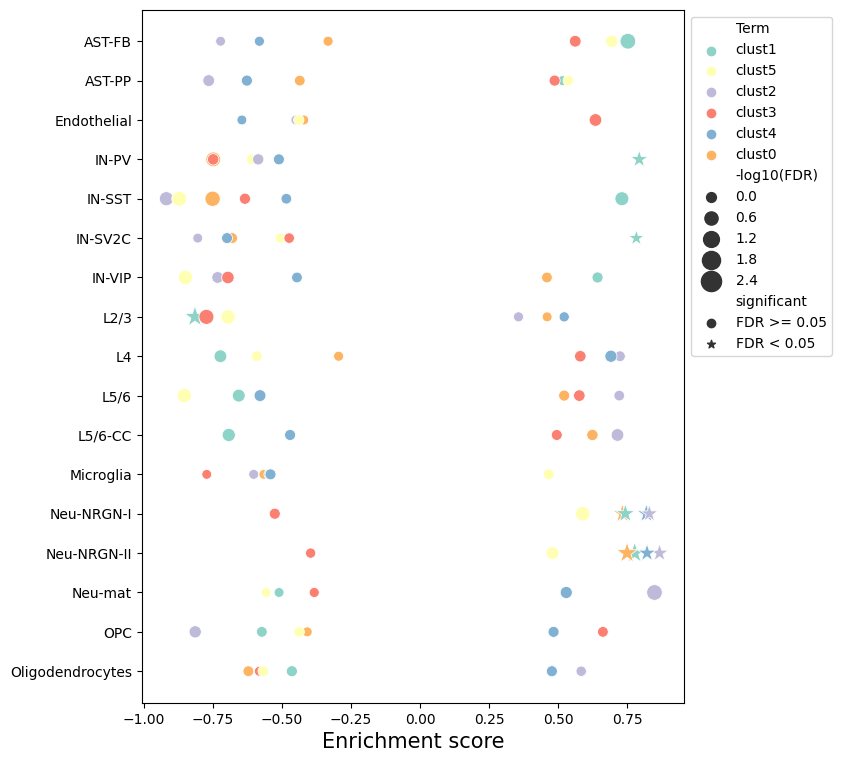

In [48]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 9), dpi=100)
#color_dict_labels = {'human-specific': 'tab:blue', 'age-specific': 'tab:orange', 'maybe human-specific': 'tab:red', 'maybe age-specific': 'tab:green'}
palette = sns.color_palette("Set3")

ax = sns.scatterplot(
    data=enrich_res.reset_index(),
    x='ES',
    y='celltype',
    size='-log10(FDR)',
    sizes=(50, 250),
    hue='Term',
    palette=palette,
    style='significant',
    markers={'FDR < 0.05': '*', 'FDR >= 0.05': 'o'}
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Enrichment score",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
#ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

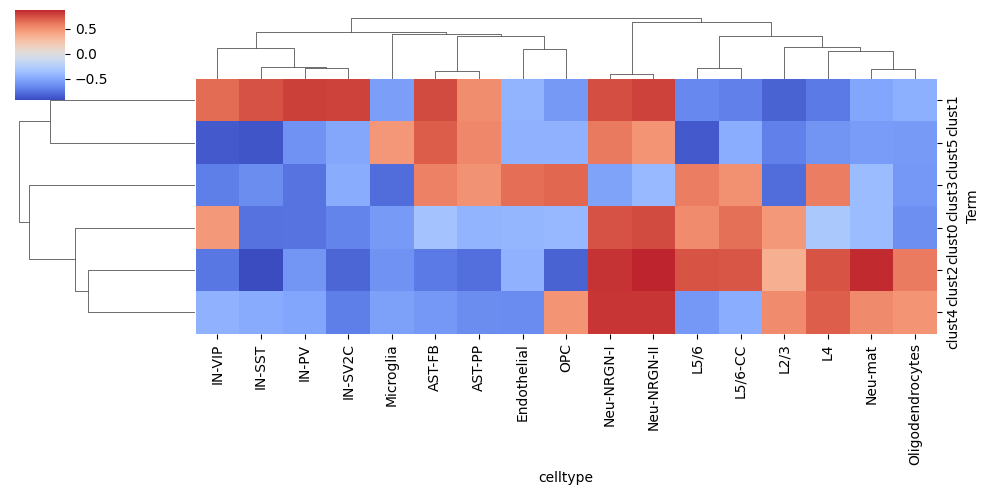

In [49]:
import seaborn as sns
es_df = enrich_res.pivot(index='Term', columns='celltype', values='ES')
sns.clustermap(es_df.astype(float), figsize=(10, 5), cmap='coolwarm', center=0)

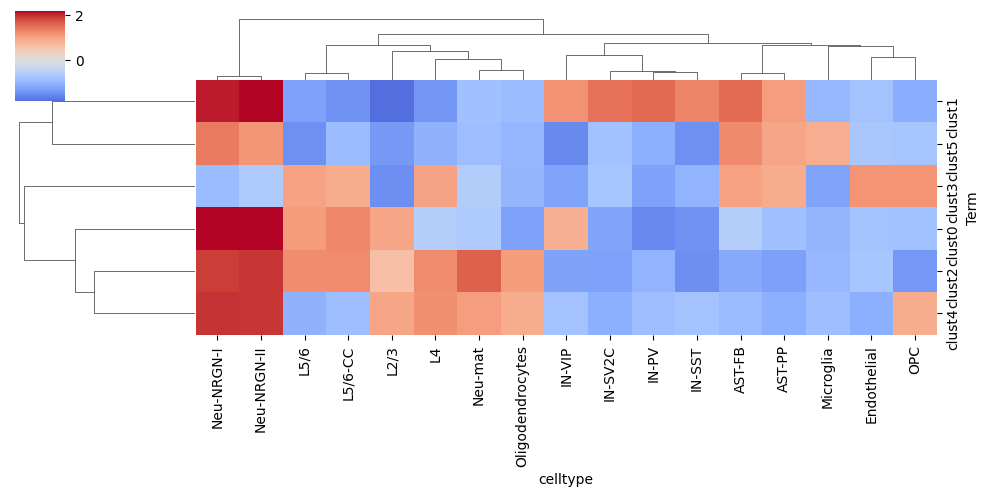

In [50]:
es_df = enrich_res.pivot(index='Term', columns='celltype', values='NES')
sns.clustermap(es_df.astype(float), figsize=(10, 5), cmap='coolwarm', center=0)

### Logreg

In [51]:
cluster_names = adata_pb.obs.cluster.unique().to_list()
res_df_list = list()

for celltype in cluster_names:
  de_res = sc.get.rank_genes_groups_df(adata_pb, group=celltype, key='logreg', pval_cutoff=None)
  gene_rank = de_res.set_index('names').sort_values('scores', ascending=False)
  gsea_res = gseapy.prerank(rnk=gene_rank, # or rnk = rnk,
                      gene_sets=cluster_dict,
                      threads=4,
                      min_size=0,
                      max_size=1000,
                      permutation_num=1000, # reduce number to speed up testing
                      outdir=None, # don't write to disk
                      seed=4,
                      verbose=True, # see what's going on behind the scenes
                      )
  res_df = gsea_res.res2d
  res_df['celltype'] = celltype
  res_df_list.append(res_df)

C:\Users\aleks\AppData\Local\Temp\ipykernel_27084\2480297587.py:1: FutureWarning: Categorical.to_list is deprecated and will be removed in a future version. Use obj.tolist() instead
  cluster_names = adata_pb.obs.cluster.unique().to_list()
2024-04-02 11:55:47,631 [WARNING] Duplicated values found in preranked stats: 0.01% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-04-02 11:55:47,634 [INFO] Parsing data files for GSEA.............................
2024-04-02 11:55:47,645 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=0
2024-04-02 11:55:47,648 [INFO] 0006 gene_sets used for further statistical testing.....


2024-04-02 11:55:47,650 [INFO] Start to run GSEA...Might take a while..................
2024-04-02 11:55:51,482 [INFO] Congratulations. GSEApy runs successfully................

2024-04-02 11:55:51,613 [INFO] Parsing data files for GSEA.............................
2024-04-02 11:55:51,625 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=0
2024-04-02 11:55:51,630 [INFO] 0006 gene_sets used for further statistical testing.....
2024-04-02 11:55:51,632 [INFO] Start to run GSEA...Might take a while..................
2024-04-02 11:55:55,695 [INFO] Congratulations. GSEApy runs successfully................

2024-04-02 11:55:55,813 [INFO] Parsing data files for GSEA.............................
2024-04-02 11:55:55,827 [INFO] 0000 gene_sets have been filtered out when max_size=1000 and min_size=0
2024-04-02 11:55:55,832 [INFO] 0006 gene_sets used for further statistical testing.....


: 

In [ ]:
enrich_res = pd.concat(res_df_list, axis=0)
enrich_res['-log10(FDR)'] = -np.log10(enrich_res['FDR q-val'].astype(float) + 1e-3)
enrich_res['direction'] = enrich_res['ES'].map(lambda x: 'enriched' if x > 0 else 'depleted')
enrich_res['significant'] = enrich_res['FDR q-val'].map(lambda x: 'FDR < 0.05' if x < 0.05 else 'FDR >= 0.05')
enrich_res.head()

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,celltype,-log10(FDR),direction,significant
0,prerank,clust5,0.588266,1.211591,0.246503,0.987979,0.603,3/8,5.32%,LHX2;CHST10;ETFB,AST-FB,0.004813,enriched,FDR >= 0.05
1,prerank,clust1,0.519452,1.188272,0.250415,0.540927,0.648,6/13,20.48%,NDUFB7;NDUFB10;GAD1;TCEAL4;PSMB7;AMZ2,AST-FB,0.266059,enriched,FDR >= 0.05
2,prerank,clust3,0.512115,1.006238,0.480944,0.617439,0.848,2/7,8.47%,MACF1;ID2,AST-FB,0.208703,enriched,FDR >= 0.05
3,prerank,clust4,-0.420731,-0.917096,0.535545,1.0,0.82866,3/8,15.61%,IGSF21;CD47;PTPRK,AST-FB,-0.000434,depleted,FDR >= 0.05
4,prerank,clust2,-0.366146,-0.757608,0.786364,0.788907,0.938733,1/7,1.97%,PPA1,AST-FB,0.102424,depleted,FDR >= 0.05


d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

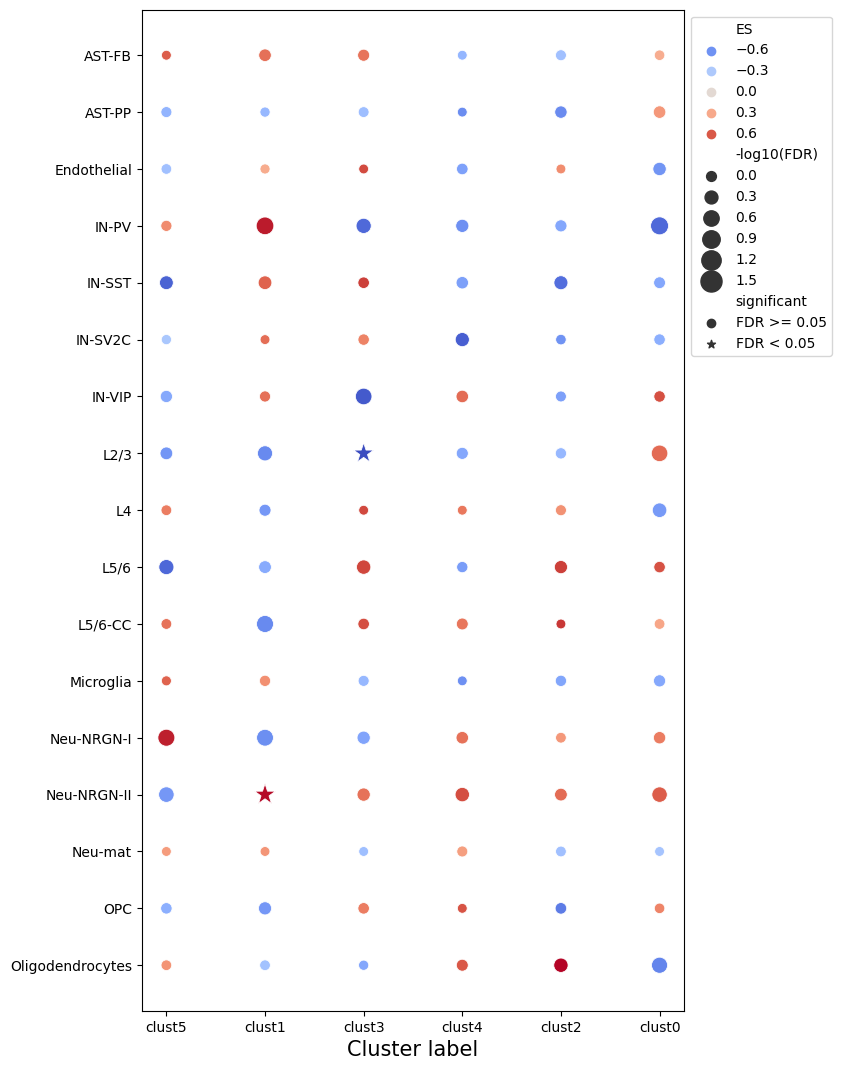

In [ ]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 9), dpi=100)
palette = sns.color_palette("coolwarm", as_cmap=True)


ax = sns.scatterplot(
    data=enrich_res.reset_index(),
    x='Term',
    y='celltype',
    size='-log10(FDR)',
    sizes=(50, 250),
    hue='ES',
    palette=palette,
    style='significant',
    markers={'FDR < 0.05': '*', 'FDR >= 0.05': 'o'}
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
#ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Projects\spatialMPFC\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

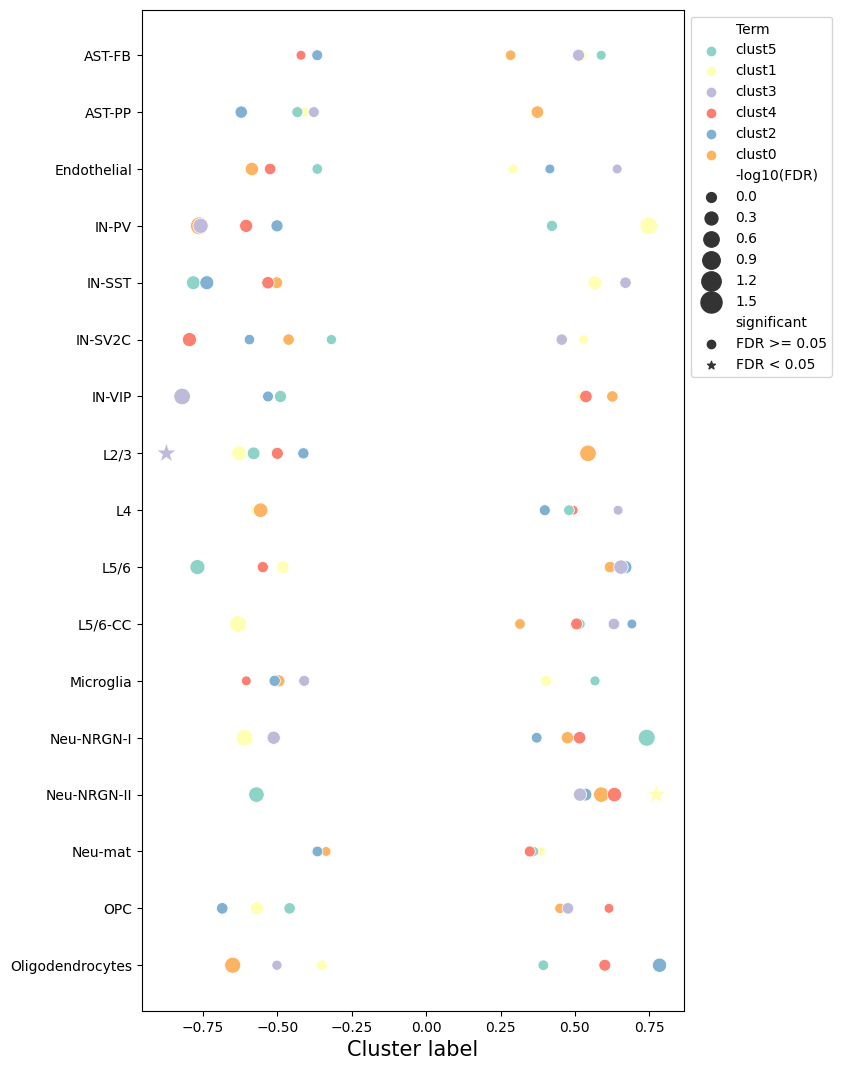

In [ ]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 9), dpi=100)
color_dict_labels = {'human-specific': 'tab:blue', 'age-specific': 'tab:orange', 'maybe human-specific': 'tab:red', 'maybe age-specific': 'tab:green'}
palette = sns.color_palette("Set3")

ax = sns.scatterplot(
    data=enrich_res.reset_index(),
    x='ES',
    y='celltype',
    size='-log10(FDR)',
    sizes=(50, 250),
    hue='Term',
    palette=palette,
    style='significant',
    markers={'FDR < 0.05': '*', 'FDR >= 0.05': 'o'}
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
#ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

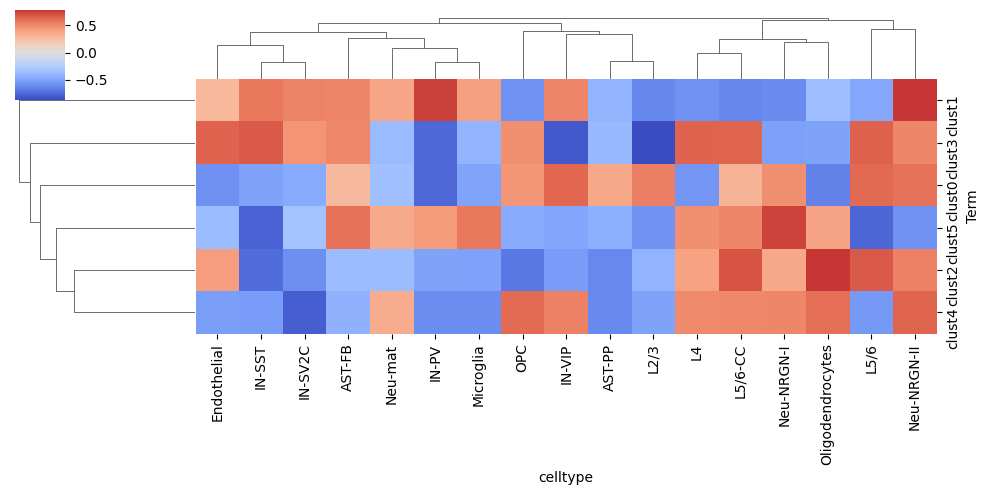

In [ ]:
import seaborn as sns
es_df = enrich_res.pivot(index='Term', columns='celltype', values='ES')
sns.clustermap(es_df.astype(float), figsize=(10, 5), cmap='coolwarm', center=0)

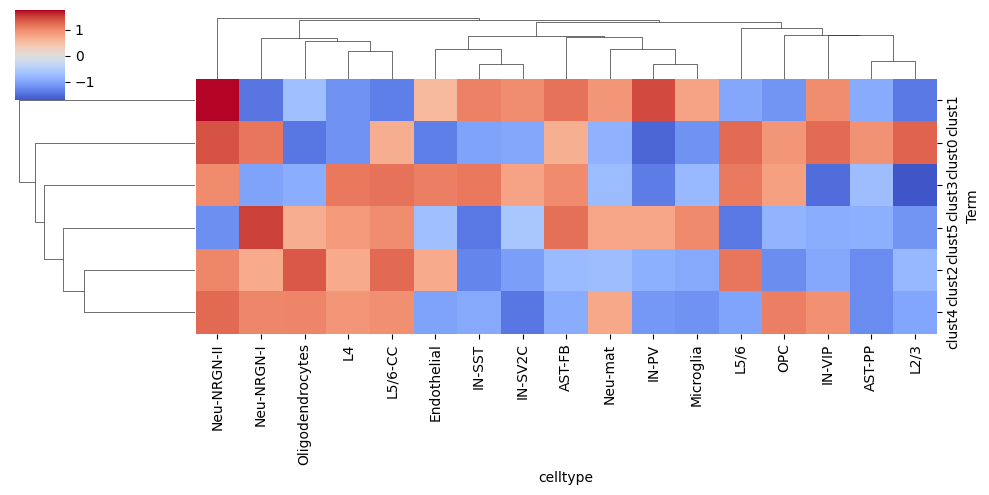

In [ ]:
es_df = enrich_res.pivot(index='Term', columns='celltype', values='NES')
sns.clustermap(es_df.astype(float), figsize=(10, 5), cmap='coolwarm', center=0)